# Data transforming and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(16,8)
mpl.rcParams['font.size']= 16

station_data=pd.read_csv("data/station_data.csv")
trip_data=pd.read_csv("data/trip_data.csv")
weather_data=pd.read_csv("data/weather_data.csv")

In [2]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
Id            76 non-null int64
Name          76 non-null object
Lat           76 non-null float64
Long          76 non-null float64
Dock Count    76 non-null int64
City          76 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 3.6+ KB


In [3]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


### First remark
The Trip dataset does not have all the columns stated in the documentation (Start Terminal and Duration are missing). However, Start Terminal seems redundant with Start Station so this one probably is just an error in the documentation. Duration can be recomputed if necessary.

In [4]:
weather_data.info()
print("Dates without any value missing: " + str(weather_data.loc[(weather_data.drop(columns="Events")).dropna().index,:].shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
Date                         1825 non-null object
Max TemperatureF             1821 non-null float64
Mean TemperatureF            1821 non-null float64
Min TemperatureF             1821 non-null float64
Max Dew PointF               1775 non-null float64
MeanDew PointF               1775 non-null float64
Min DewpointF                1775 non-null float64
Max Humidity                 1775 non-null float64
Mean Humidity                1775 non-null float64
Min Humidity                 1775 non-null float64
Max Sea Level PressureIn     1824 non-null float64
Mean Sea Level PressureIn    1824 non-null float64
Min Sea Level PressureIn     1824 non-null float64
Max VisibilityMiles          1820 non-null float64
Mean VisibilityMiles         1820 non-null float64
Min VisibilityMiles          1820 non-null float64
Max Wind SpeedMPH            1824 non-null float64
Mean Wind SpeedMPH         

Let's decide first which values to keep, to avoid deleting so many cases

In [5]:
weather_data.describe()

Max TemperatureF  Mean TemperatureF  Min TemperatureF  Max Dew PointF  \
count       1821.000000        1821.000000       1821.000000     1775.000000   
mean          70.637013          61.837452         52.733663       54.460845   
std            8.260028           6.893216          7.037803        6.330125   
min           50.000000          41.000000         30.000000       20.000000   
25%           64.000000          57.000000         48.000000       50.000000   
50%           70.000000          61.000000         53.000000       55.000000   
75%           76.000000          67.000000         58.000000       59.000000   
max          102.000000          82.000000         75.000000       68.000000   

       MeanDew PointF  Min DewpointF  Max Humidity  Mean Humidity  \
count     1775.000000    1775.000000   1775.000000    1775.000000   
mean        50.397183      46.135775     87.505915      69.282817   
std          7.101097       8.548960      8.537459      10.408295   
min         13.000000       4.000000     25.000000      25.000000   
25%         47.000000      41.000000     83.000000      64.000000   
50%         51.000000      48.000000     88.000000      70.000000   
75%         56.000000      53.000000     93.000000      75.000000   
max         64.000000      63.000000    100.000000      96.000000   

       Min Humidity  Max Sea Level PressureIn  ...  Max VisibilityMiles  \
count   1775.000000               1824.000000  ...          1820.000000   
mean      48.769014                 30.070641  ...            10.475275   
std       14.274316                  0.135416  ...             2.083719   
min        4.000000                 29.670000  ...             5.000000   
25%       40.000000                 29.970000  ...            10.000000   
50%       50.000000                 30.050000  ...            10.000000   
75%       57.000000                 30.170000  ...            10.000000   
max       86.000000                 30.480000  ...            20.000000   

       Mean VisibilityMiles  Min VisibilityMiles  Max Wind SpeedMPH  \
count           1820.000000          1820.000000        1824.000000   
mean               9.636813             7.948901          16.347588   
std                1.433697             2.993878           8.592296   
min                4.000000             0.000000           4.000000   
25%               10.000000             6.000000          12.000000   
50%               10.000000            10.000000          16.000000   
75%               10.000000            10.000000          20.000000   
max               20.000000            20.000000         128.000000   

       Mean Wind SpeedMPH  Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
count         1824.000000        1284.000000      1824.000000  1824.000000   
mean             6.150219          21.690810         0.025032     3.110746   
std              3.238621           6.052399         0.177212     2.297131   
min              0.000000           7.000000         0.000000     0.000000   
25%              4.000000          18.000000         0.000000     1.000000   
50%              6.000000          22.000000         0.000000     3.000000   
75%              8.000000          25.000000         0.000000     5.000000   
max             23.000000          62.000000         3.360000     8.000000   

       WindDirDegrees           Zip  
count     1824.000000   1825.000000  
mean       260.584430  94325.000000  
std         95.985517    404.670892  
min          0.000000  94041.000000  
25%        242.000000  94063.000000  
50%        295.000000  94107.000000  
75%        328.000000  94301.000000  
max        360.000000  95113.000000  

[8 rows x 22 columns]

In [6]:
corr=weather_data.corr()
corr.style.background_gradient(cmap='coolwarm')

## Variable selection

Let's get rid of some variables that we won't use. Some of them seem unlikely to directly influence the amount of bikes taken, and some are highly correlated with others. This creates some redundancy in information, that we want to avoid (both in terms of the variable exploration, and for the future ML models).

We don't need a min/mean/max value for each measure, so we'll only keep the mean ones.

The Dew point does not seem like a variable of interest, on top of being very correlated to the mean temperature so we will also leave it aside. Same thing for the Sea level pressure.

Direction of the wind also seems unlikely to be interesting.

Let's not drop na values yet, as we need to do more data manipulation and exploration before selecting final variables to keep

In [7]:
weather_data_used=weather_data.loc[:,["Date", "Zip", "Mean TemperatureF", "Mean Humidity", "Mean VisibilityMiles", "Mean Wind SpeedMPH", "PrecipitationIn", "CloudCover"]]
weather_data_used.loc[weather_data_used.loc[:,"Zip"]==94107,"Zip"]="San Francisco"
weather_data_used.loc[weather_data_used.loc[:,"Zip"]==94063,"Zip"]="Redwood City"
weather_data_used.loc[weather_data_used.loc[:,"Zip"]==94301,"Zip"]="Palo Alto"
weather_data_used.loc[weather_data_used.loc[:,"Zip"]==94041,"Zip"]="Mountain View"
weather_data_used.loc[weather_data_used.loc[:,"Zip"]==95113,"Zip"]="San Jose"
weather_data_used.rename(columns={"Zip":"City"}, inplace=True)
print(weather_data_used.head())

         Date           City  Mean TemperatureF  Mean Humidity  \
0  01/09/2014  San Francisco               70.0           64.0   
1  02/09/2014  San Francisco               66.0           73.0   
2  03/09/2014  San Francisco               69.0           69.0   
3  04/09/2014  San Francisco               68.0           71.0   
4  05/09/2014  San Francisco               66.0           71.0   

   Mean VisibilityMiles  Mean Wind SpeedMPH  PrecipitationIn  CloudCover  
0                  10.0                 7.0              0.0         0.0  
1                  10.0                 8.0              0.0         5.0  
2                  10.0                 8.0              0.0         4.0  
3                  10.0                 8.0              0.0         5.0  
4                   9.0                 8.0              0.0         4.0  


## Stations moved
Since all stations moved within a same town, and within a few dozen meters maximum, let's just ignore stations __before__ they moved. Or more precisely, let's consider that data about stations before they moved just belongs to the latter station. There's no reason to believe predictions should be very different.

In [0]:
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==23,85)
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==25,86)
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==49,87)
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==69,88)
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==72,90)
trip_data.loc[:,["Start Station","End Station"]]=trip_data.loc[:,["Start Station","End Station"]].mask(trip_data.loc[:,["Start Station","End Station"]]==89,90)

## Clean dataset creation

### Time

Right now we don't need minute-level precision (Hour is fine)

Also, let's split between day and hour (and drop the original date table)

In [0]:
start_date=trip_data.loc[:,"Start Date"].str.split(" ")
end_date=trip_data.loc[:,"End Date"].str.split(" ")

trip_data.loc[:,"Start Day"]=start_date.str[0]
trip_data.loc[:,"End Day"]=end_date.str[0]
trip_data.loc[:,"Start Hour"]=start_date.str[1].str.split(":").str[0].astype(int)
trip_data.loc[:,"End Hour"]=end_date.str[1].str.split(":").str[0].astype(int)

Let's fuse all the possibly useful information into one dataset

### Important:
We have a lot of trip information, and it will be assumed here that the dataset is complete over the period considered (otherwise not much can be infered anyway). This means that at any hour and any station, if we do not have any trip starting of ending there means we have a net change of 0 bike. Part of the code below is to add those 0s.

In [0]:
import datetime as dt
count_out=trip_data.groupby(["Start Station", "Start Day", "Start Hour"])["Trip ID"].count() # number of bikes taken for each station/day/hour
count_out=count_out.reset_index()
count_out.rename(columns={"Trip ID": "count out", "Start Station": "station", "Start Day": "day", "Start Hour": "hour"}, inplace=True)
count_in=trip_data.groupby(["End Station", "End Day", "End Hour"])["Trip ID"].count()        # number of bikes given back for each station/day/hour
count_in=count_in.reset_index()
count_in.rename(columns={"Trip ID": "count in", "End Station": "station", "End Day": "day", "End Hour": "hour"}, inplace=True)

# There are probably vectorized ways to do this but it seems less readable
day_series=[]
hour_series=[]
station_series=[]
for day in trip_data.loc[:,"Start Day"].unique():
    for hour in trip_data.loc[:,"Start Hour"].unique():
        for station in trip_data.loc[:,"Start Station"].unique():
            day_series.append(day)
            hour_series.append(hour)
            station_series.append(station)

ML_dataset=pd.DataFrame(data={"day": day_series, "hour": hour_series, "station": station_series})

ML_dataset=pd.merge(ML_dataset, count_out, how="left")
ML_dataset=pd.merge(ML_dataset, count_in, how="left")
ML_dataset=pd.merge(ML_dataset, station_data.loc[:,["Id", "Name" ,"City", "Dock Count"]], left_on="station", right_on="Id", how="left").drop(columns="Id")
ML_dataset.rename(columns={"day": "Date"}, inplace=True)       #Just to make the merge easier
ML_dataset=pd.merge(ML_dataset, weather_data_used, how="left")
ML_dataset.rename(columns={"Date": "day", "City": "city", "Dock Count": "dock count", "Name": "station name"}, inplace=True)
ML_dataset=ML_dataset.fillna(value={"count in": 0, "count out": 0})
ML_dataset.loc[:,"net change"]=ML_dataset.loc[:,"count in"]-ML_dataset.loc[:,"count out"]
ML_dataset.drop(columns=["count out", "count in"], inplace=True)
ML_dataset.loc[:,"weekday"]=ML_dataset.loc[:,"day"].apply(lambda x: int(dt.datetime.strptime(x,"%d/%m/%Y").weekday()<5))
datetime_full=pd.to_datetime(ML_dataset.apply(lambda x:'%s %s'%(x["day"], x["hour"]),axis=1),format='%d/%m/%Y %H')
ML_dataset.loc[:,"datetime"]=datetime_full
ML_dataset.loc[:,"year"]=datetime_full.dt.year
ML_dataset.loc[:,"month"]=datetime_full.dt.month
ML_dataset.loc[:,"day"]=datetime_full.dt.day
ML_dataset.loc[:,"hour"]=datetime_full.dt.hour
ML_dataset.index=ML_dataset.loc[:,"datetime"]

In [116]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 613200 entries, 2015-08-31 23:00:00 to 2014-09-01 02:00:00
Data columns (total 17 columns):
day                     613200 non-null int64
hour                    613200 non-null int64
station                 613200 non-null int64
station name            613200 non-null object
city                    613200 non-null object
dock count              613200 non-null int64
Mean TemperatureF       612576 non-null float64
Mean Humidity           607056 non-null float64
Mean VisibilityMiles    612600 non-null float64
Mean Wind SpeedMPH      613080 non-null float64
PrecipitationIn         613080 non-null float64
CloudCover              613080 non-null float64
net change              613200 non-null float64
weekday                 613200 non-null int64
datetime                613200 non-null datetime64[ns]
year                    613200 non-null int64
month                   613200 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(7),

## Dataset exploration
Now that we have our main variable of interest (net change) and a working dataset, we can continue exploring it a bit.

First thing we look into is the general usage of stations in each city, so that we can find meaningful stations to explore in priority.

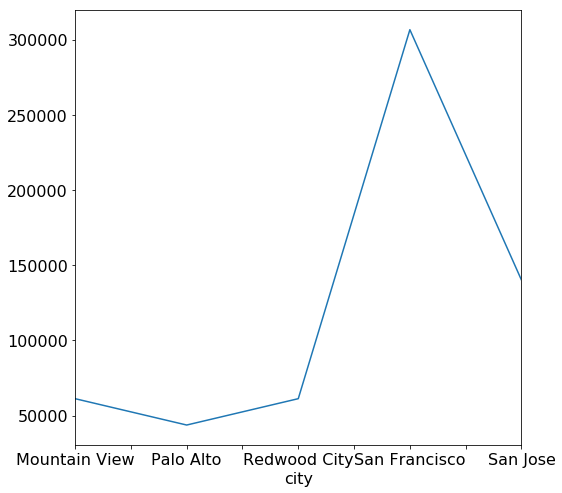

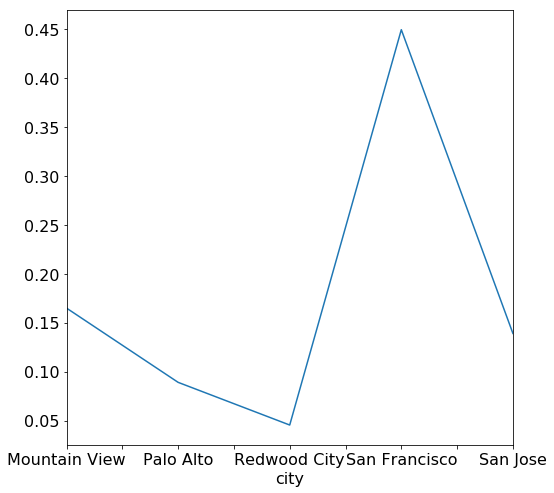

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plot_city=ML_dataset.groupby("city")["net change"].count().plot()
plt.show()
plt.figure(figsize=(8,8))
plot_city=(ML_dataset.loc[ML_dataset.loc[:,"net change"]!=0,:].groupby("city")["net change"].count()/ML_dataset.groupby("city")["net change"].count()).plot()
plt.show()

It would seem that not only San Francisco is the city with the most stations, but it is also the city where the stations are most used. Redwood City have a net change per hour different from 0 only 5% of the time. This does not mean that those stations are only used 5% of the time, as it could be that they received and lost the same amount of bikes for some hours. Nevertheless, since it is probably only marginal it still gives a rough idea

Let's also take a look at how our different variables are related to our variable of interest (net change)

In [118]:
corr=ML_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

Let's take a look at the 5 stations that seem to have the most movements, and pick one of them to start with a more thorough exploration

The 5 stations that seem the least used are also listed for info

In [119]:
print(trip_data.loc[:,"End Station"].value_counts().head(5))
print(trip_data.loc[:,"End Station"].value_counts().tail(5))

70    34810
88    22523
50    17810
61    15463
65    15422
Name: End Station, dtype: int64
26    230
85    187
83    145
21    100
24     98
Name: End Station, dtype: int64


Let's create lists of the top and least used stations, to access them easily later

In [0]:
dataset_s70=ML_dataset.loc[ML_dataset.loc[:,"station"]==70,:]
dataset_s88=ML_dataset.loc[ML_dataset.loc[:,"station"]==88,:]
dataset_s50=ML_dataset.loc[ML_dataset.loc[:,"station"]==50,:]
dataset_s61=ML_dataset.loc[ML_dataset.loc[:,"station"]==61,:]
dataset_s65=ML_dataset.loc[ML_dataset.loc[:,"station"]==65,:]

dataset_s26=ML_dataset.loc[ML_dataset.loc[:,"station"]==26,:]
dataset_s85=ML_dataset.loc[ML_dataset.loc[:,"station"]==85,:]
dataset_s83=ML_dataset.loc[ML_dataset.loc[:,"station"]==83,:]
dataset_s21=ML_dataset.loc[ML_dataset.loc[:,"station"]==21,:]
dataset_s24=ML_dataset.loc[ML_dataset.loc[:,"station"]==24,:]
datasets_top=[dataset_s70, dataset_s88, dataset_s50, dataset_s61, dataset_s65]
datasets_least=[dataset_s26, dataset_s85, dataset_s83, dataset_s21, dataset_s24]

In [121]:
for dataset in datasets_top:
  print("Station " + str(dataset.loc[:,"station"][0]) + " (" + str(dataset.loc[:,"station name"][0]) + " in " + str(dataset.loc[:,"city"][0]) + ")" + " can dock at most " + str(dataset.loc[:,"dock count"][0]) + " bikes.")

Station 70 (San Francisco Caltrain (Townsend at 4th) in San Francisco) can dock at most 19 bikes.
Station 88 (San Francisco Caltrain 2 (330 Townsend) in San Francisco) can dock at most 23 bikes.
Station 50 (Harry Bridges Plaza (Ferry Building) in San Francisco) can dock at most 23 bikes.
Station 61 (2nd at Townsend in San Francisco) can dock at most 27 bikes.
Station 65 (Townsend at 7th in San Francisco) can dock at most 15 bikes.


Let's graph different variables against net change to see if we have some obvious nonlinear trends

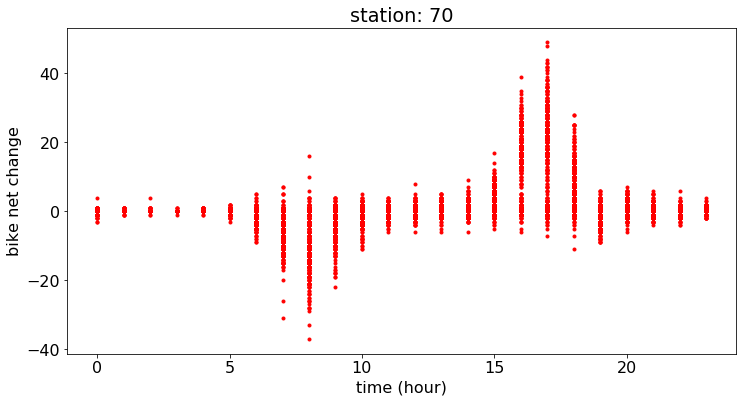

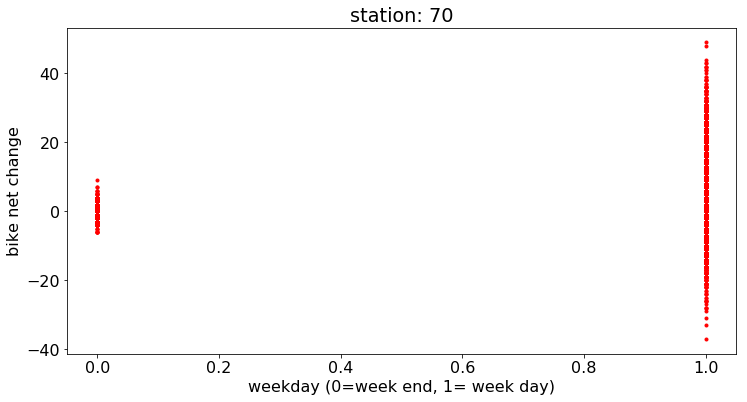

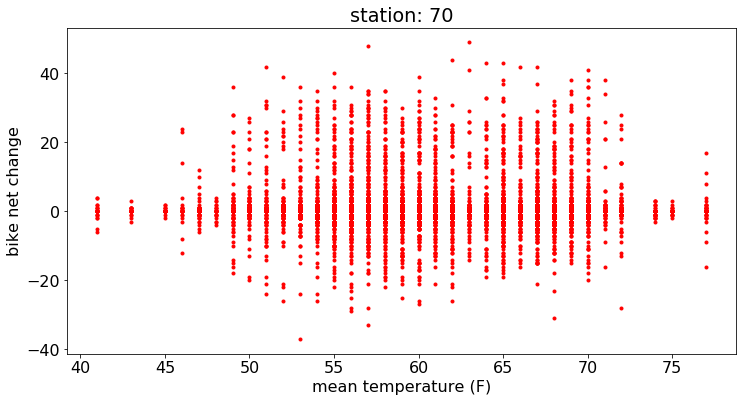

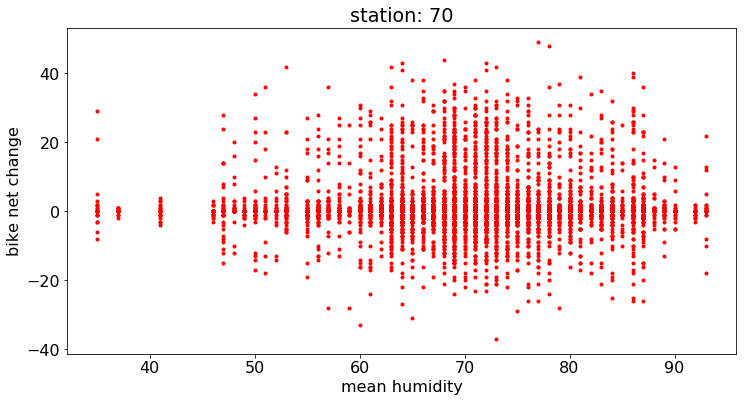

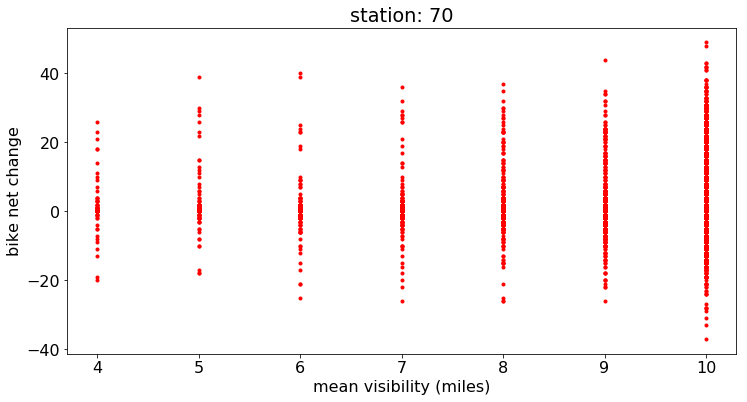

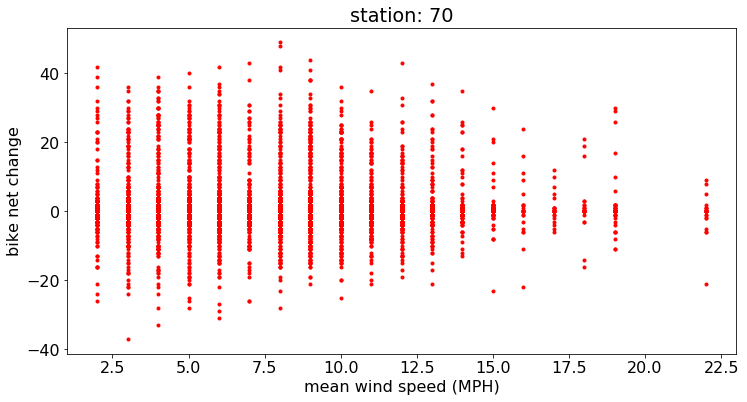

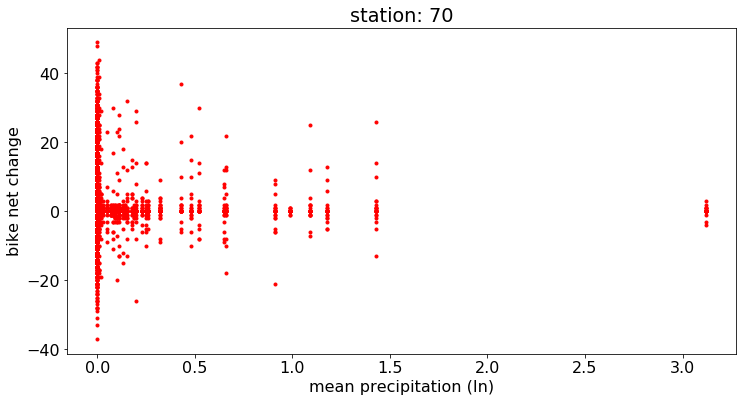

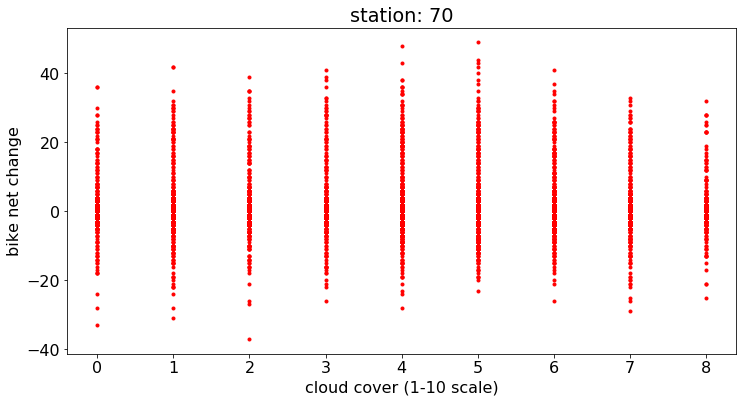

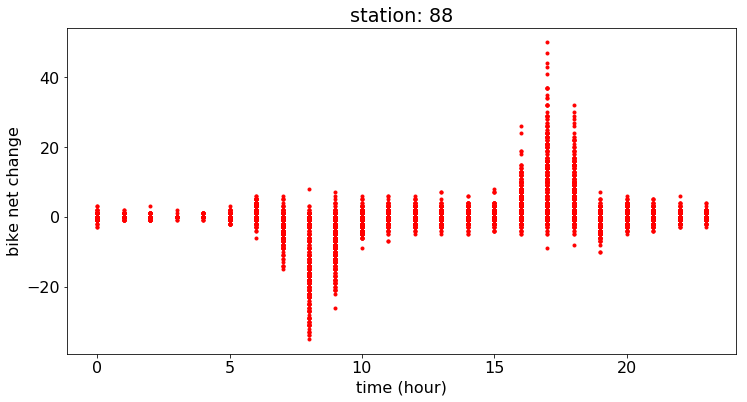

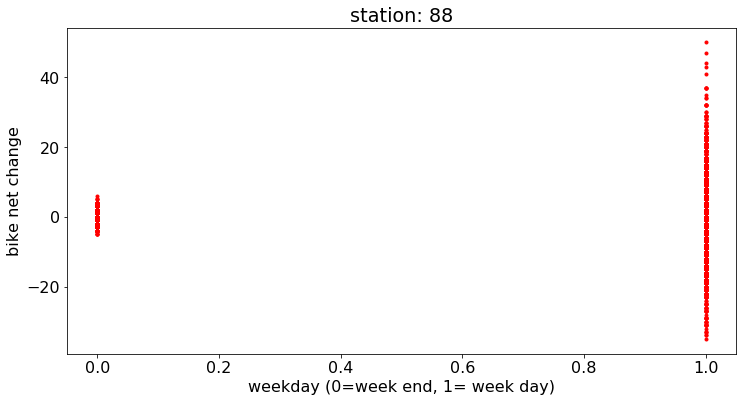

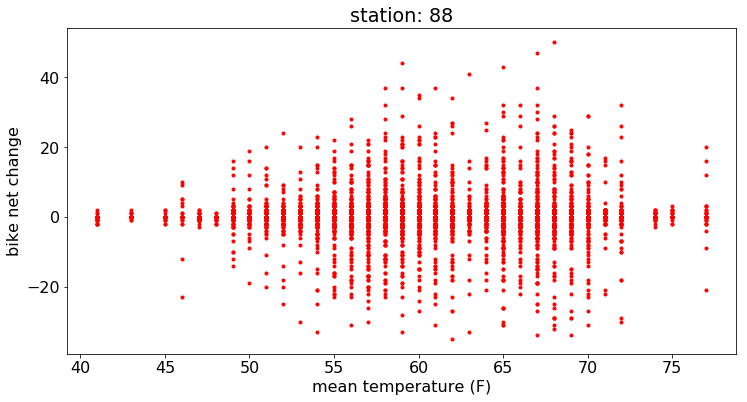

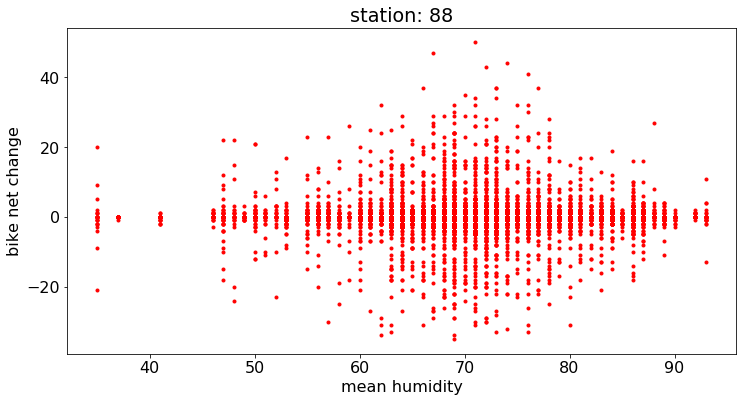

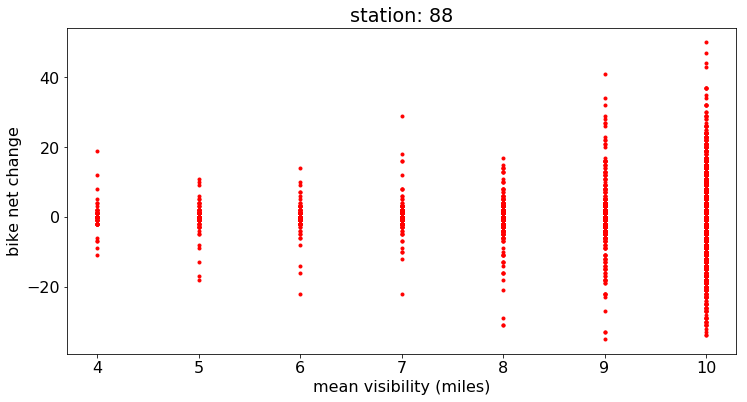

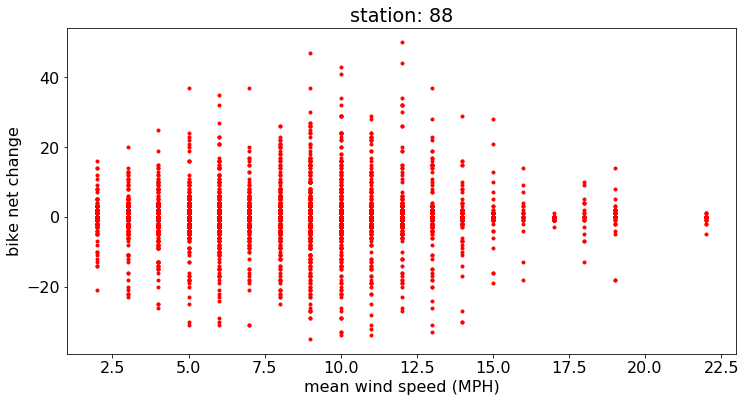

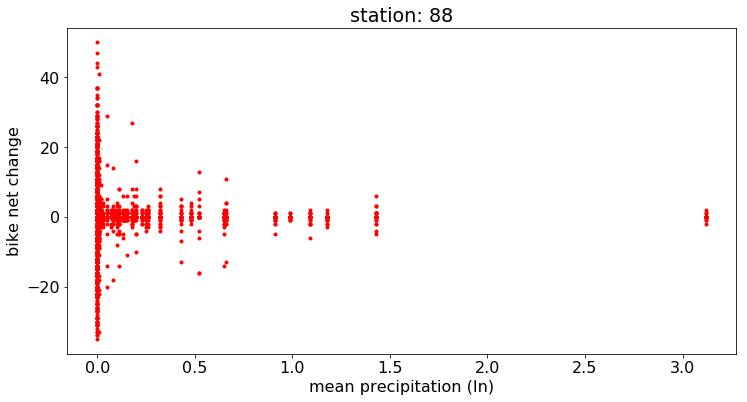

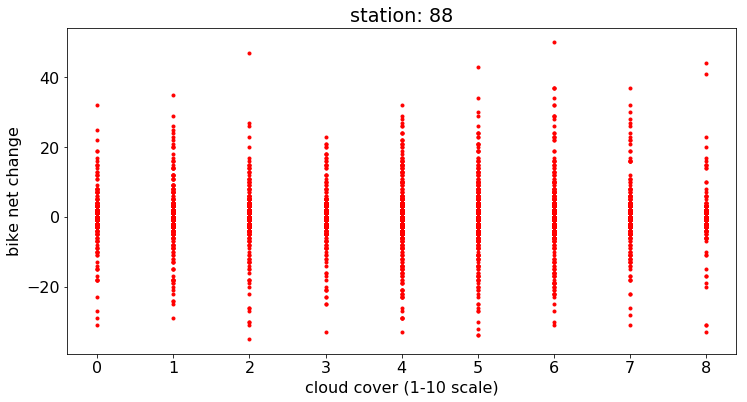

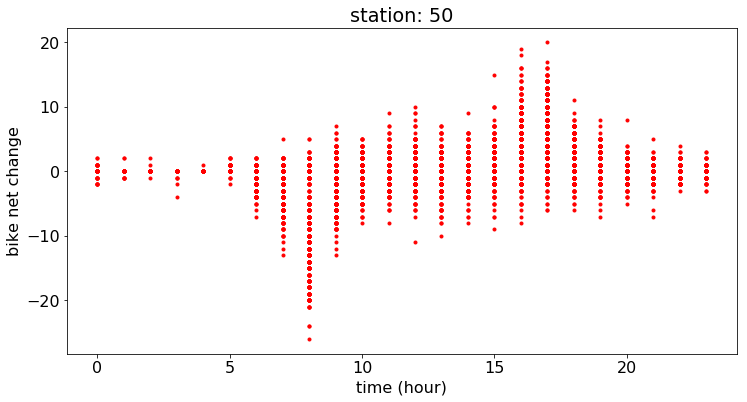

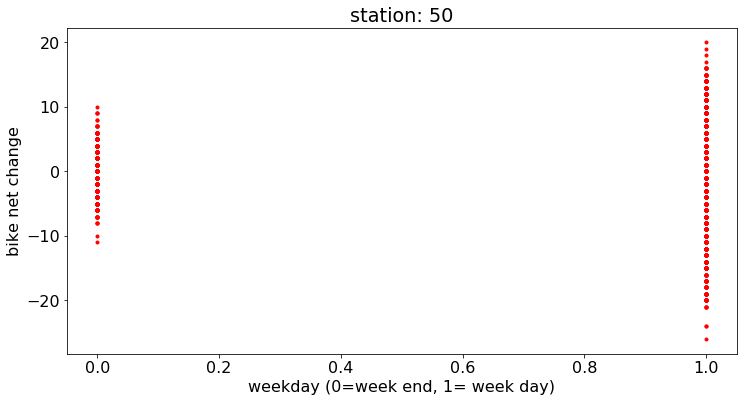

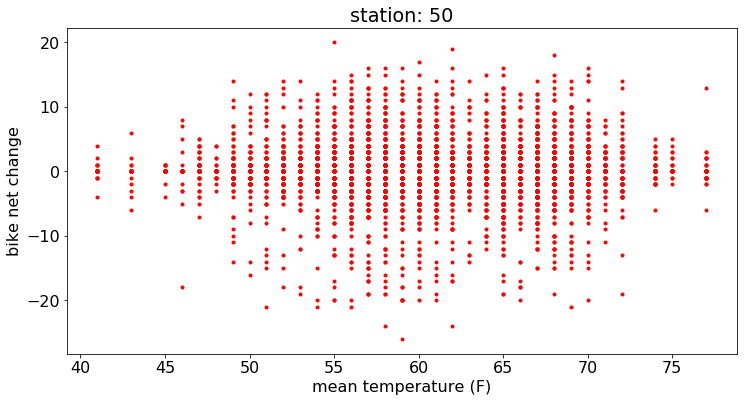

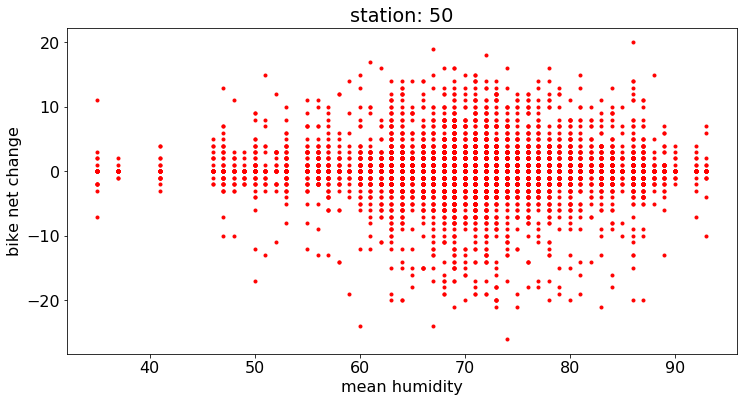

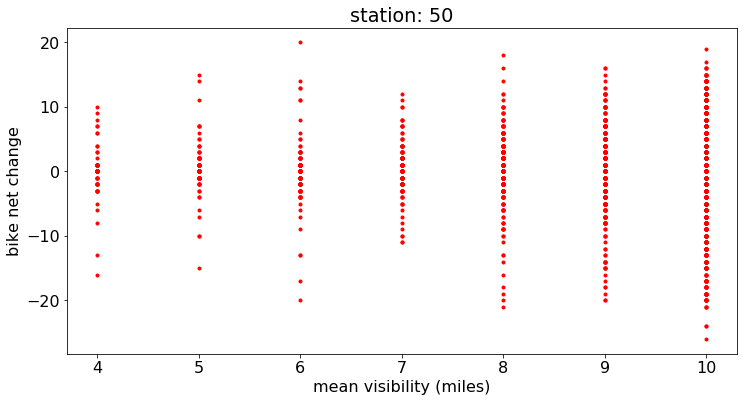

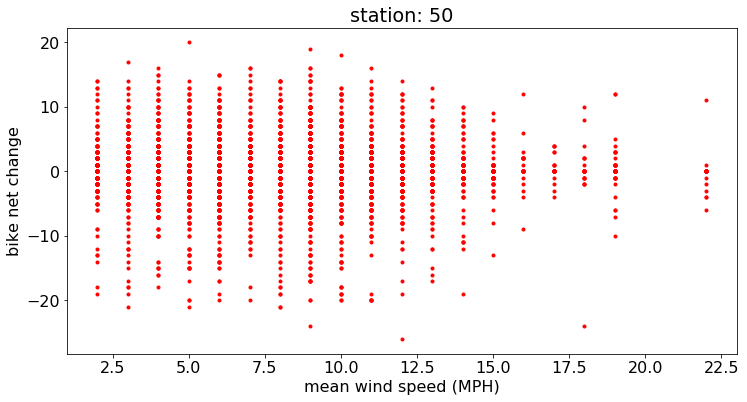

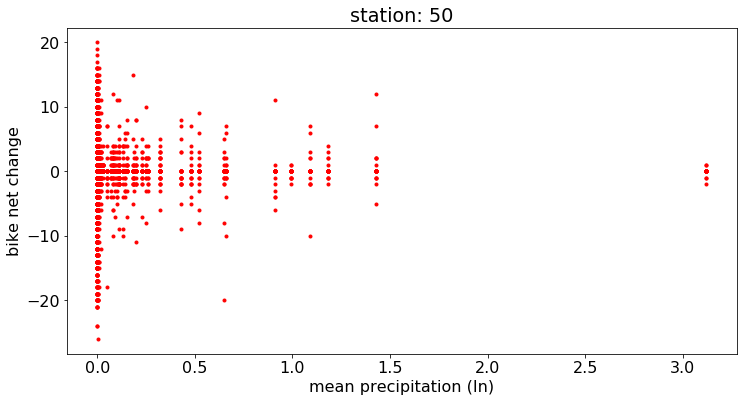

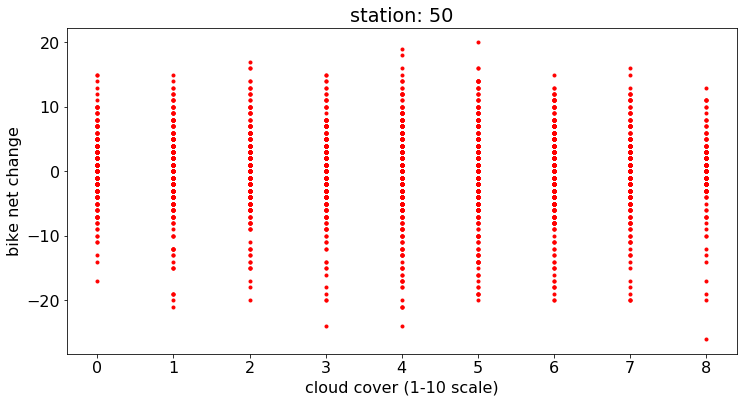

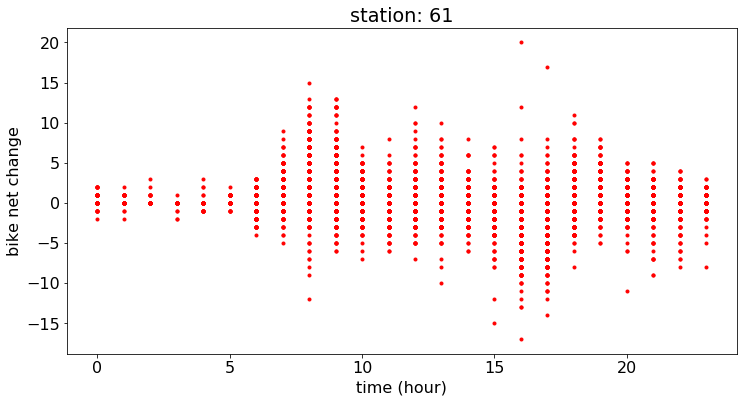

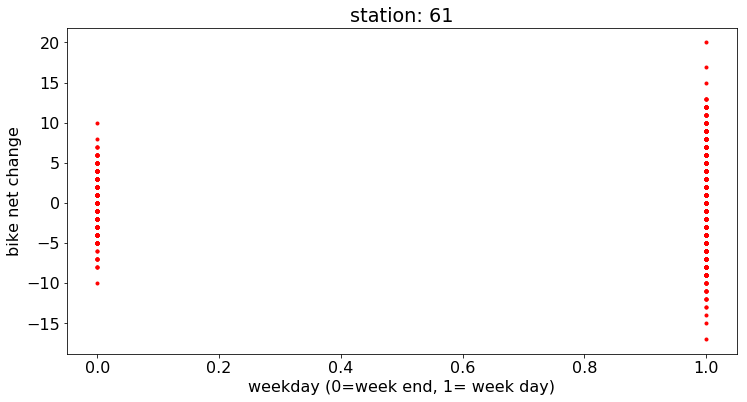

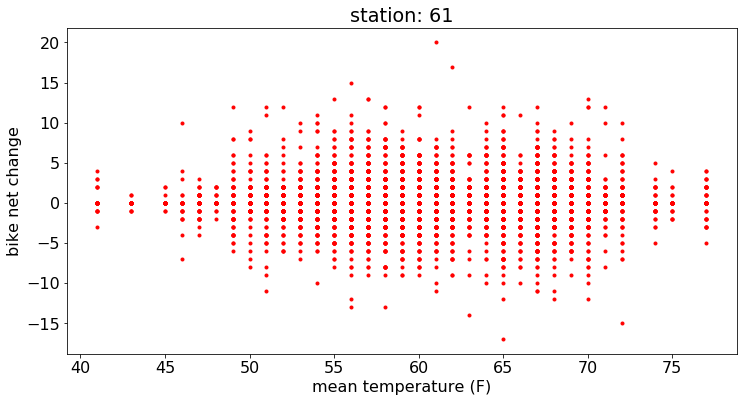

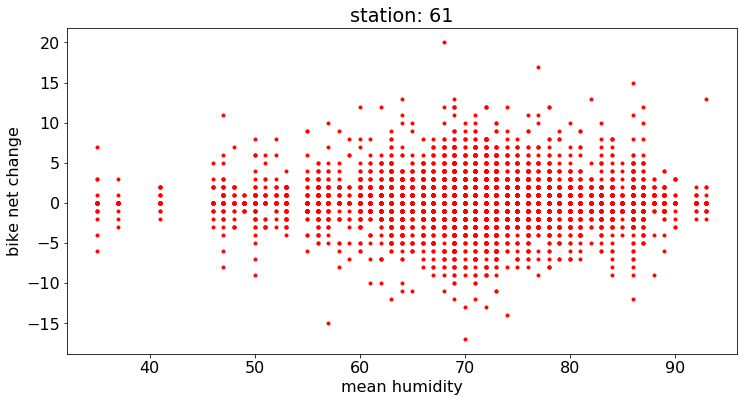

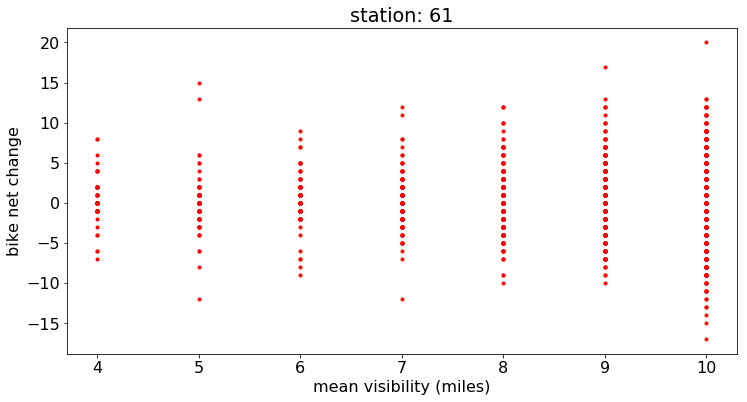

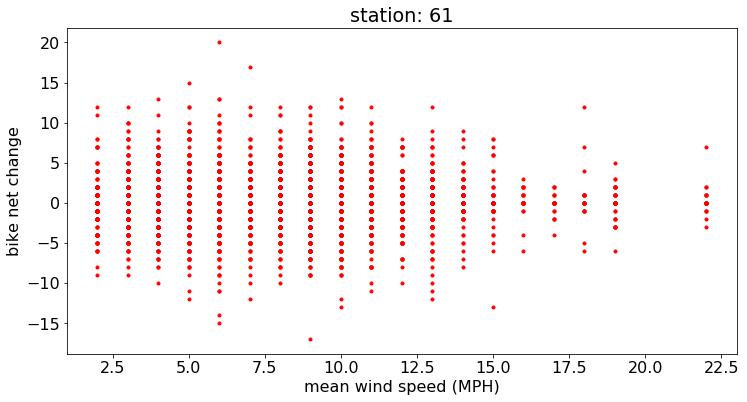

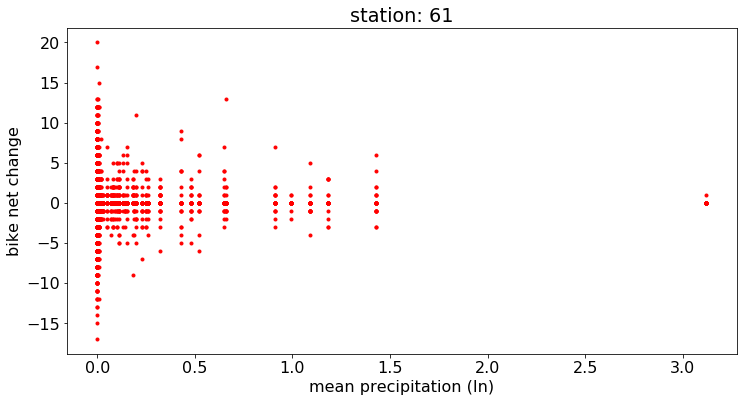

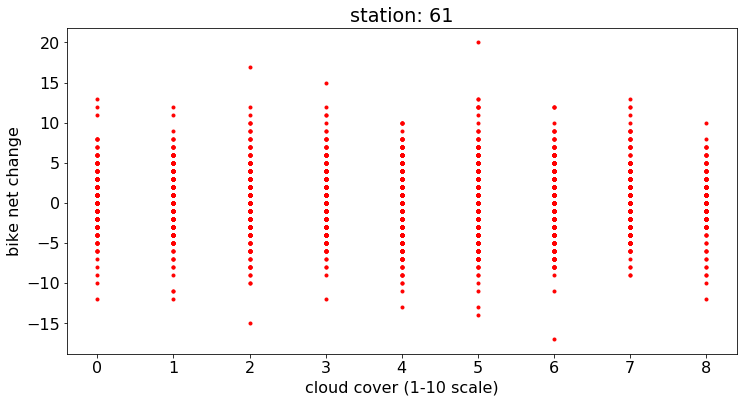

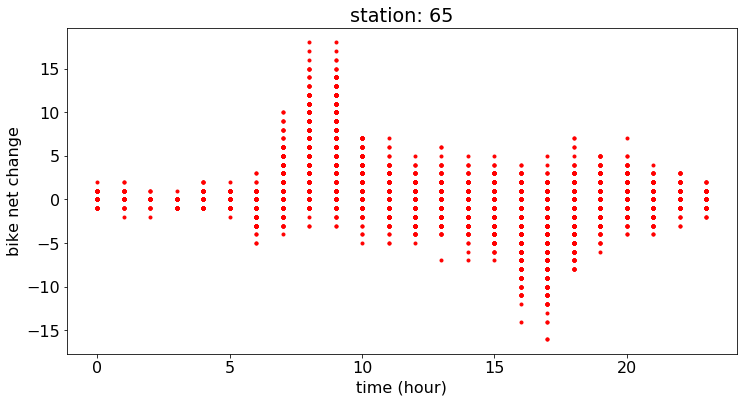

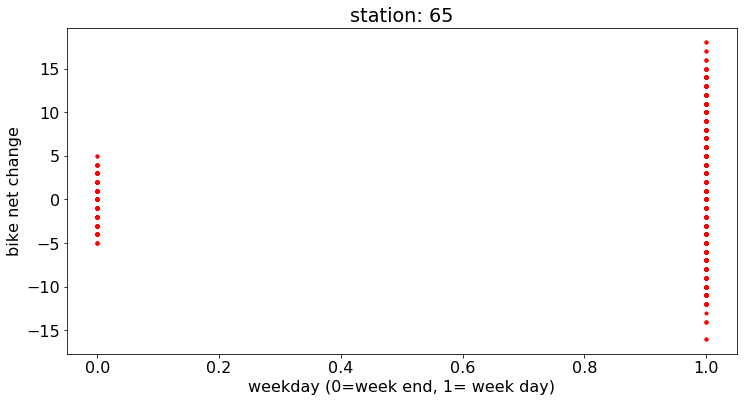

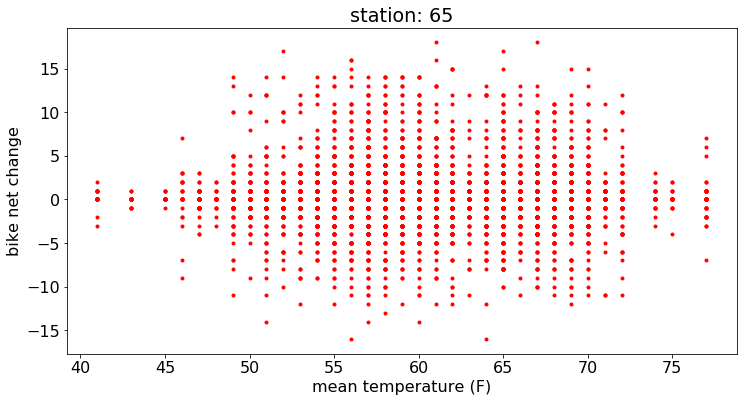

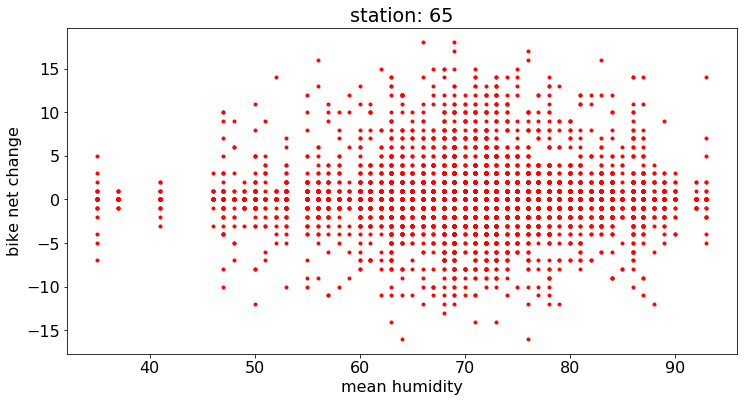

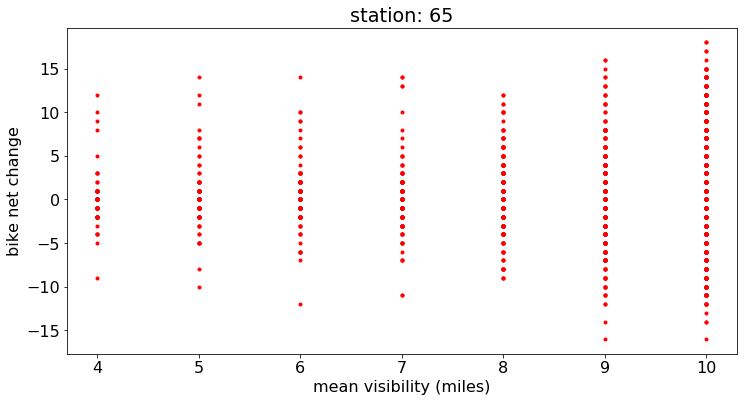

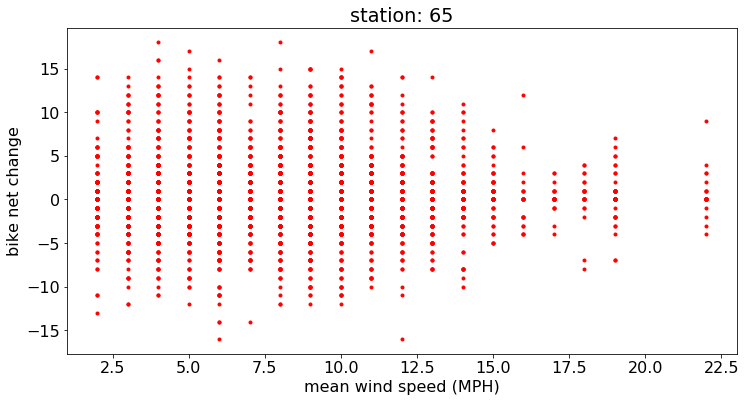

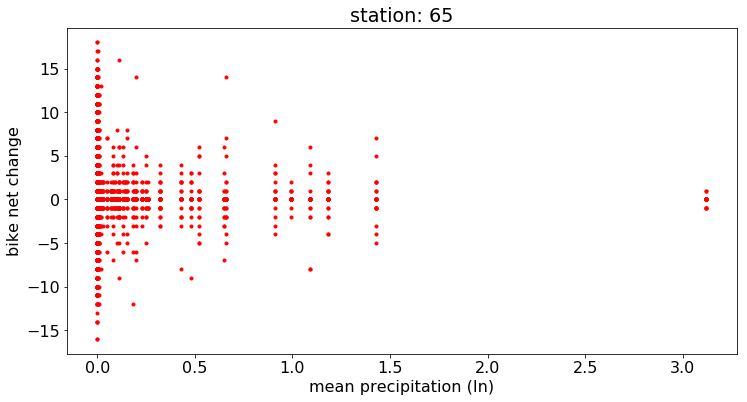

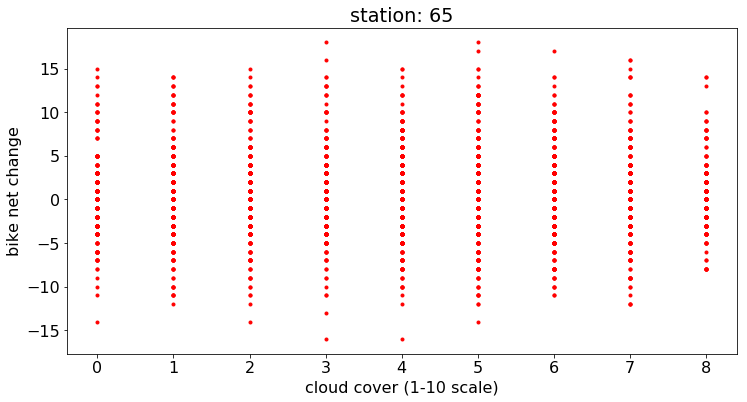

In [122]:
for dataset in datasets_top:
    plt.figure(figsize=(12,6))
    #fig, axs = plt.subplots(7,1)
    plt.plot(dataset.loc[:,"hour"], dataset.loc[:,"net change"], 'r.')
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.xlabel("time (hour)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"weekday"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("weekday (0=week end, 1= week day)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"Mean TemperatureF"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("mean temperature (F)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"Mean Humidity"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("mean humidity")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"Mean VisibilityMiles"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("mean visibility (miles)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"Mean Wind SpeedMPH"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("mean wind speed (MPH)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"PrecipitationIn"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("mean precipitation (In)")
    plt.ylabel("bike net change")
    plt.show()
    plt.figure(figsize=(12,6))
    plt.title("station: " + str(dataset.loc[:,"station"].iloc[0]))
    plt.plot(dataset.loc[:,"CloudCover"], dataset.loc[:,"net change"], 'r.')
    plt.xlabel("cloud cover (1-10 scale)")
    plt.ylabel("bike net change")
    plt.show()

### Graph exploration remarks

Hour, weekday and precipitation seem to carry quite a lot of information about net change

Temperature, humidity and wind speed follow, but seem less interesting

Visibility and Cloud Cover look like the noisiest. Therefore, they won't be used for the modeling part

To keep the future models simple, humidity and wind speed will not be used either. However, they could potentially be reincluded later if our models need them

### General observations

Across those 5 most used stations, a very clear and comparable pattern in the hour-net change relationship can be seen. It would seem that in general, people tend to take a lot of bikes around 8am, and give back bikes a the same station at around 5pm (or exactly the other way around for others). This looks like regular commuting, where people take bikes from stations near bus stops or train stations, and leave them at stations near their workplace.

The intuition of commuting is confirmed by the pattern found in the weekday-net change relationship, as very few bike movements happen during weekends. A quick check in the data file showed that Station 70 is just outside a train station.

While this could potentially call for a time-series analysis and predictions, a selection of good regressors could potentially reduce possible autocorrelation enough to have good predictions anyway.

### Exploration at 8am for station 70

Let's plot a few graphs to see if the variables we selected can explain the bigger variability at a specific hour with regular peaks

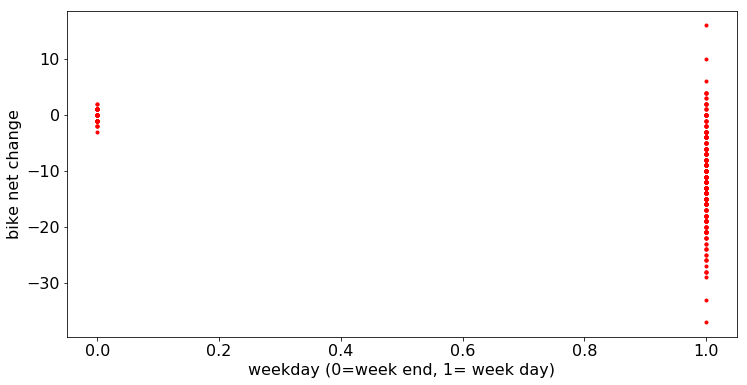

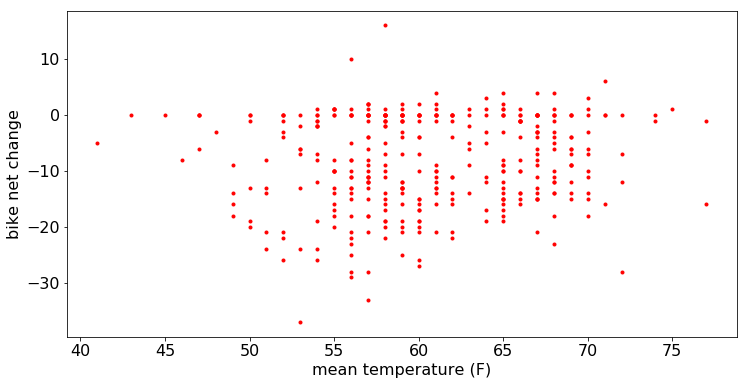

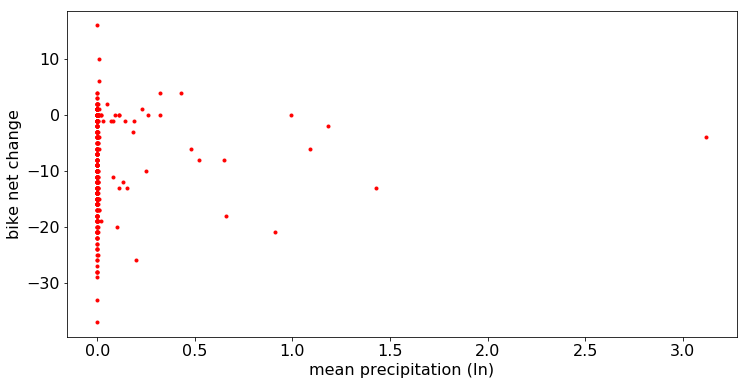

In [123]:
dataset_s70_h8=ML_dataset.loc[(ML_dataset.loc[:,"station"]==70) & (ML_dataset.loc[:,"hour"]==8),:]
plt.figure(figsize=(12,6))
plt.plot(dataset_s70_h8.loc[:,"weekday"], dataset_s70_h8.loc[:,"net change"], 'r.')
plt.xlabel("weekday (0=week end, 1= week day)")
plt.ylabel("bike net change")
plt.show()
plt.figure(figsize=(12,6))
plt.plot(dataset_s70_h8.loc[:,"Mean TemperatureF"], dataset_s70_h8.loc[:,"net change"], 'r.')
plt.xlabel("mean temperature (F)")
plt.ylabel("bike net change")
plt.show()
plt.figure(figsize=(12,6))
plt.plot(dataset_s70_h8.loc[:,"PrecipitationIn"], dataset_s70_h8.loc[:,"net change"], 'r.')
plt.xlabel("mean precipitation (In)")
plt.ylabel("bike net change")
plt.show()

No special pattern seems to arise here to easily explain the bigger variability at 8am. Interactions may be the key if we keep going with a linear regression.

Mean precipitation seems to lose a lot of its potential for this station

### Hour-by-hour Exploration (top 5 stations)

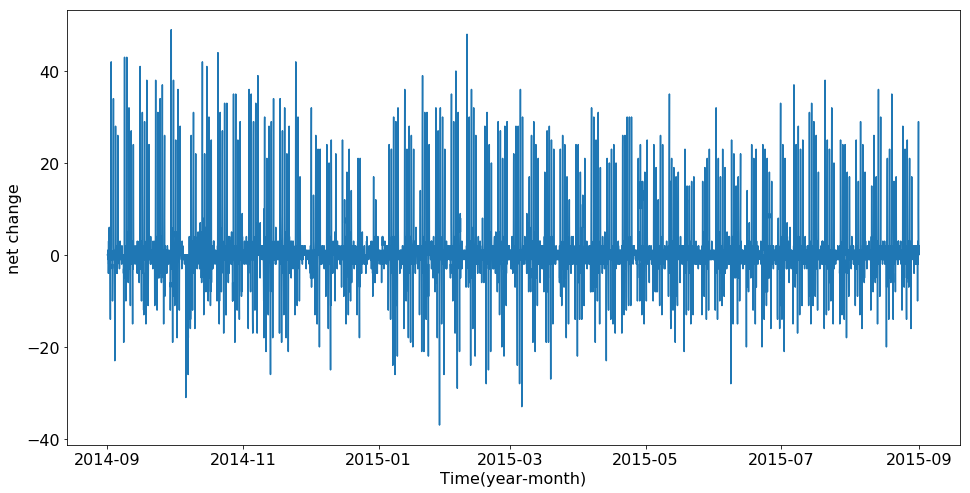

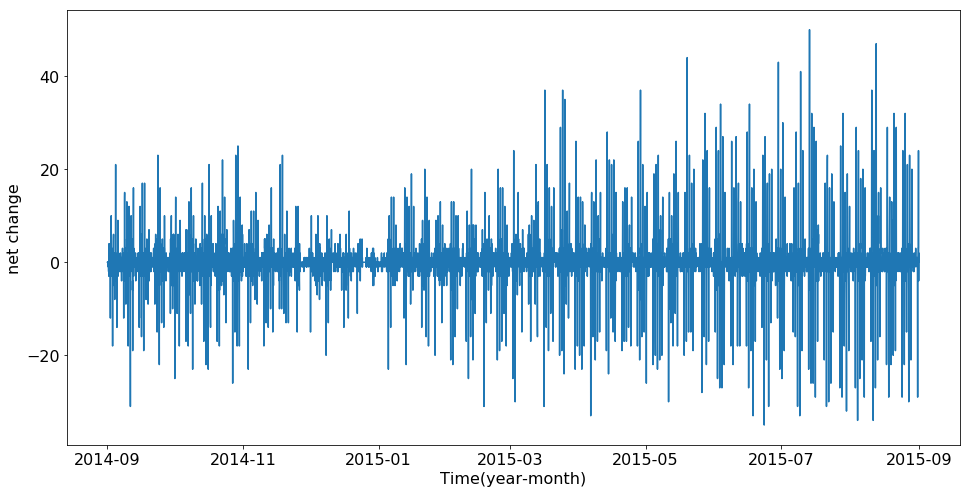

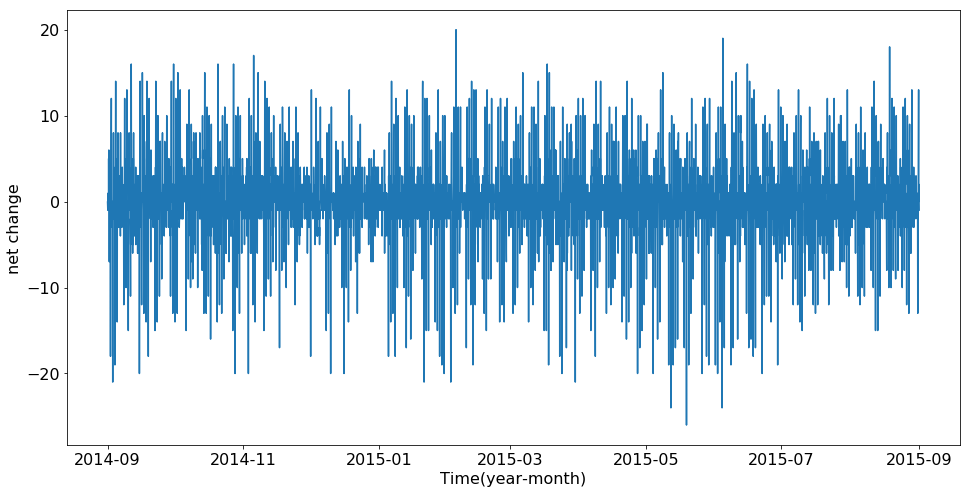

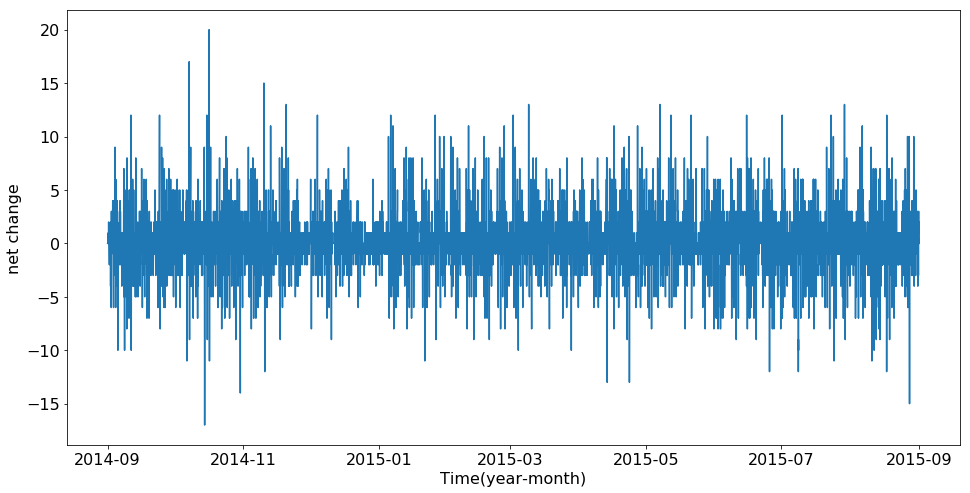

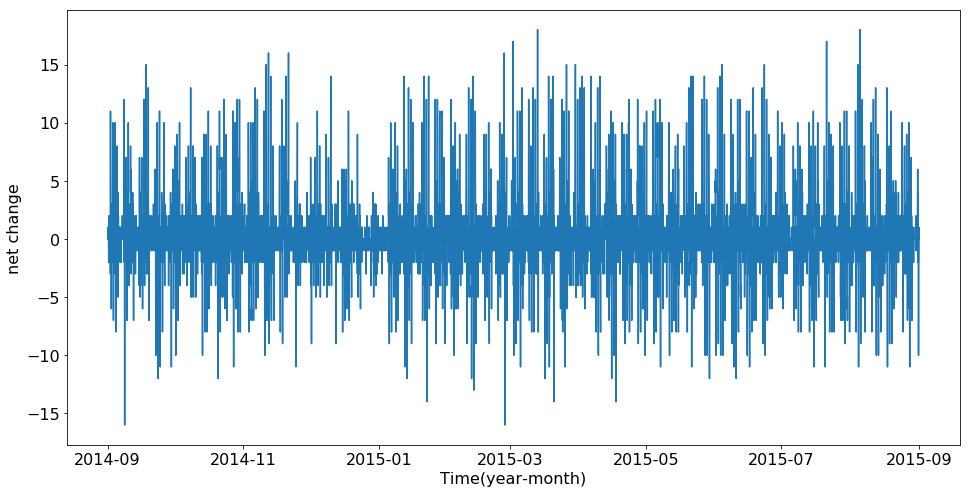

In [124]:
for dataset in datasets_top:
  plt.plot(dataset.loc[:,"net change"])
  plt.xlabel("Time(year-month)")
  plt.ylabel("net change")
  plt.show()

### Hour-by-hour exploration (least 5 stations)

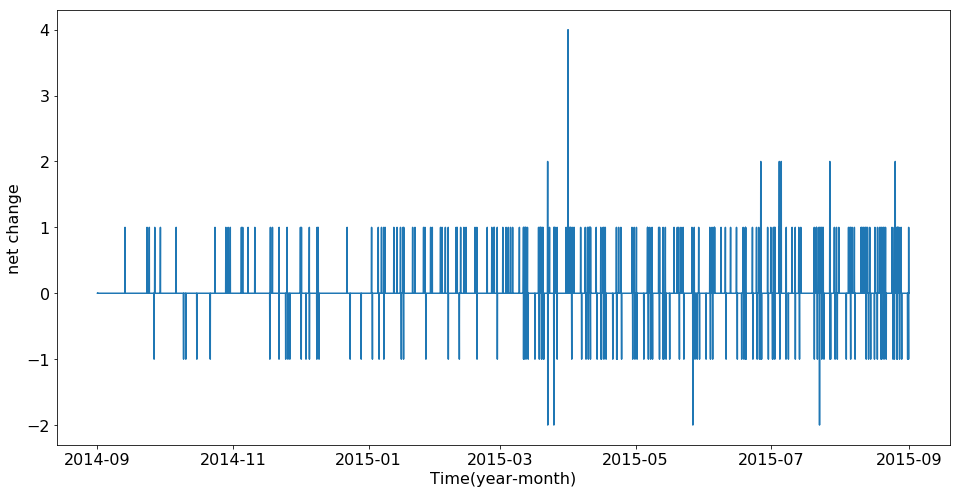

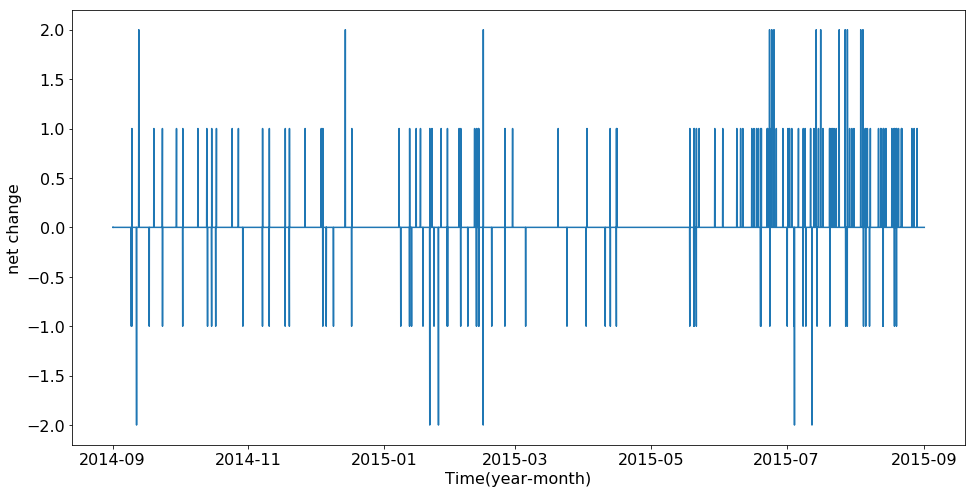

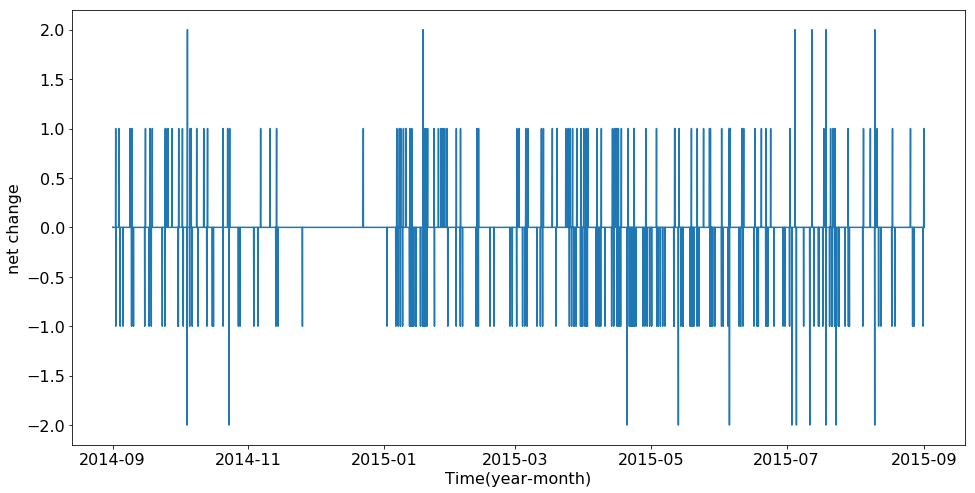

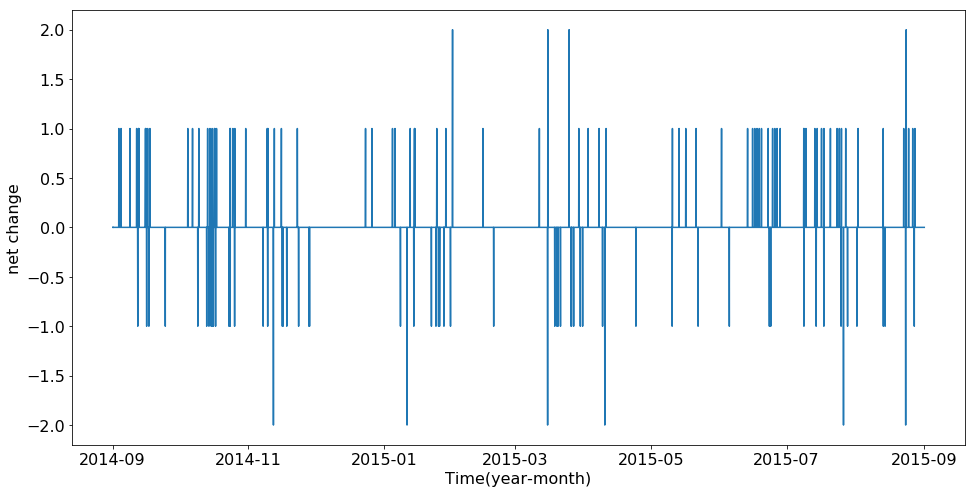

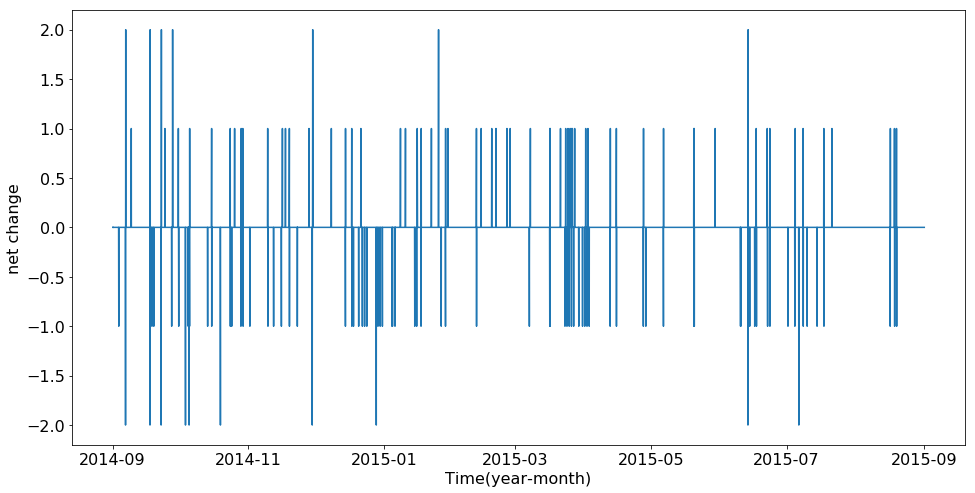

In [125]:
for dataset in datasets_least:
  plt.plot(dataset.loc[:,"net change"])
  plt.xlabel("Time(year-month)")
  plt.ylabel("net change")
  plt.show()

### Remarks about hour-by-hour exploration:
First of all, we must pay attention to scales (that weren't kept constant here to make graphs easy to read). It would seem that apart from the top 2 stations here, stations only marginally reach high numbers (>20). Most stations would probably give some time to react, as the net change is often lower than their dock count. Station 70, on the other hand, reaches net changes of around +40 or -40 for 19 docks during peak hours, which requires a fast response.

We can also see a clear tendency in top stations to use less bikes when approaching the Christmas period (and even some time before). This may be punctual; since we only have one year worth of data we cannot generalize, but this should be kept in mind for long term predictions

The least used stations patterns look a lot like noise, so it may be hard to fit a model on them. However, since their net changes are very low and quite symmetrical, they are not particularly of interest for predictions

The general trend of use seems stable across stations

# Modeling

## Regression with Lasso

As mentioned before, we will try to fit a multiple regression to the data despite the time series aspect. We will therefore treat each day/hour as if they were independent from one another, and adding the right variables may be able to mitigate the likely autocorrelation enough to make good predictions.

Considering the general shape of some relationships between variables and net change, we will introduce polynomial terms, but limit ourselves to degree 6. It should be sufficient to match the curve shapes, reduce our chance to overfit, and the number of necessary computations should be reasonable.

We will use a Lasso analysis with cross-validation to prevent overfitting and select for us a model with a good tradeoff between adding more variables/polynomial degrees, and variance explanation.

Degree 1 regression
RMSE: 6.5291523150779724
Test score (R²): 0.06792889402341984


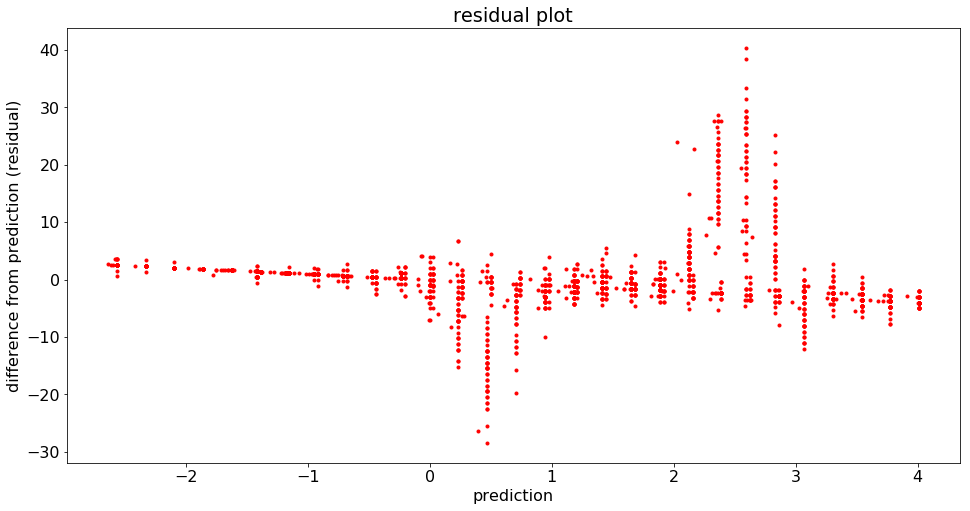

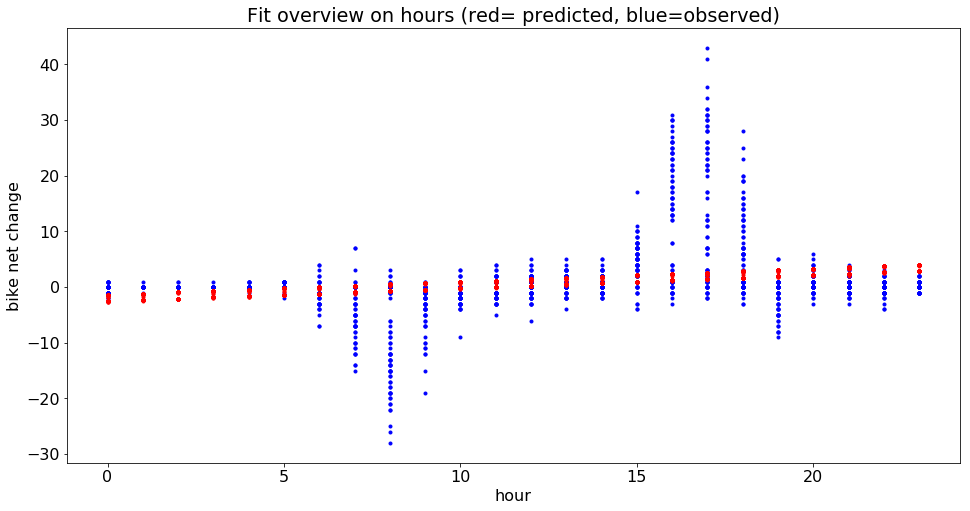

Degree 2 regression
RMSE: 6.453292881512986
Test score (R²): 0.08946174517799188


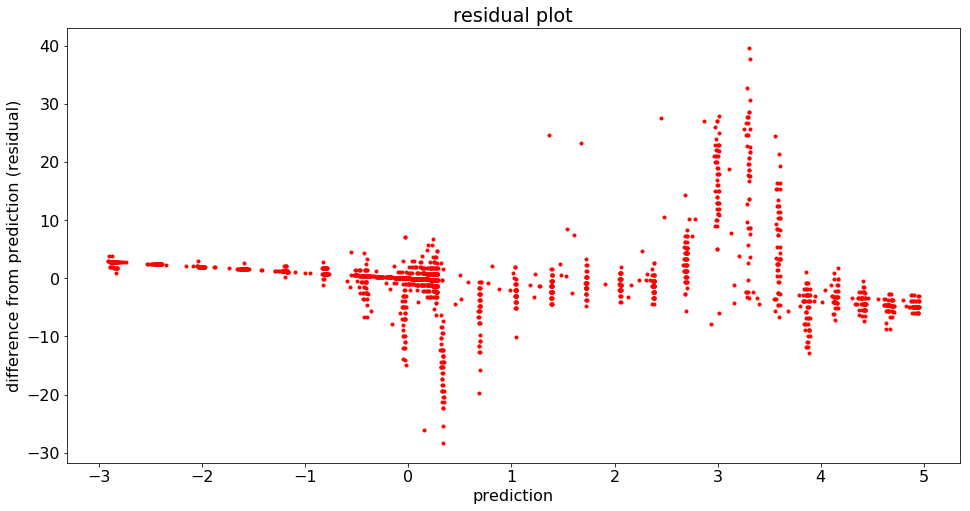

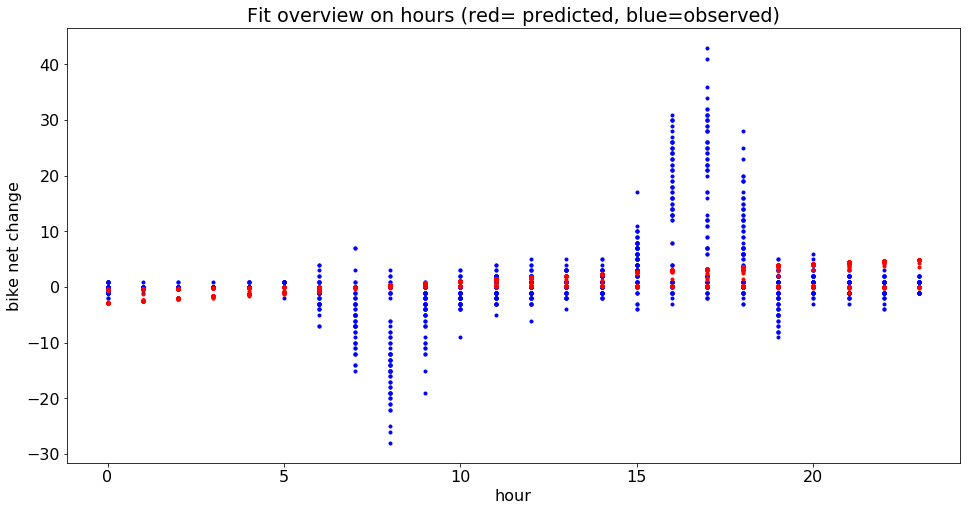

Degree 3 regression
RMSE: 5.87300878888959
Test score (R²): 0.24585171741544978


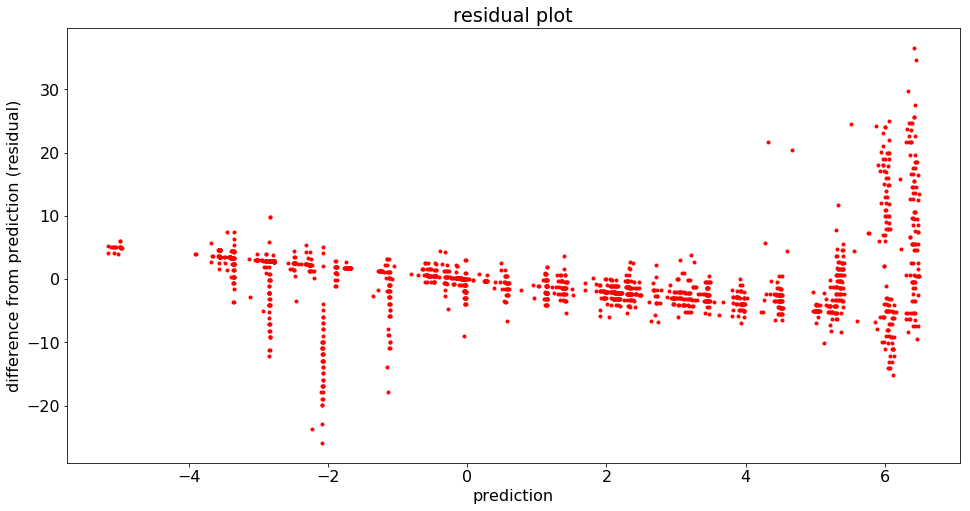

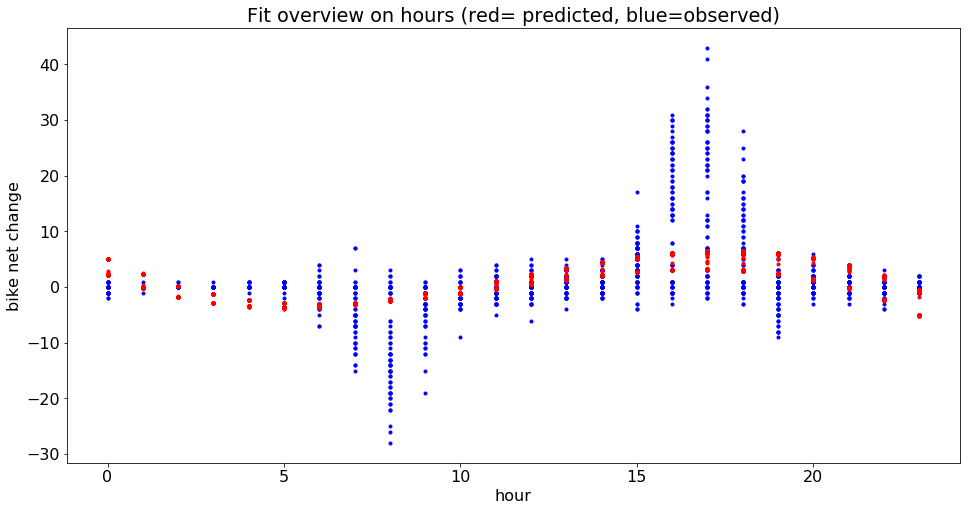

Degree 4 regression
RMSE: 5.564704138778134
Test score (R²): 0.3229517767223875


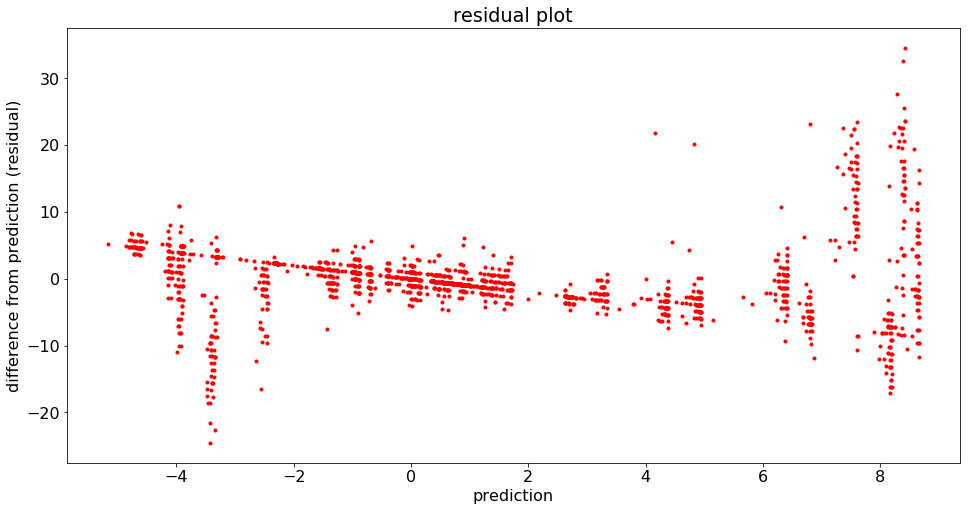

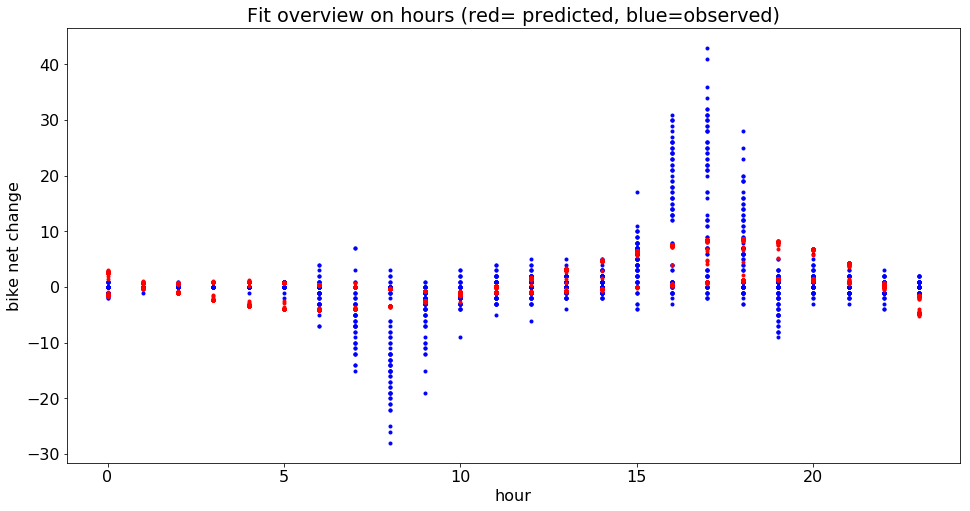

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281.7386735328473, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2771.431047756021, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5693.617480720728, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

Degree 5 regression
RMSE: 5.214755860986886
Test score (R²): 0.40542943287523336


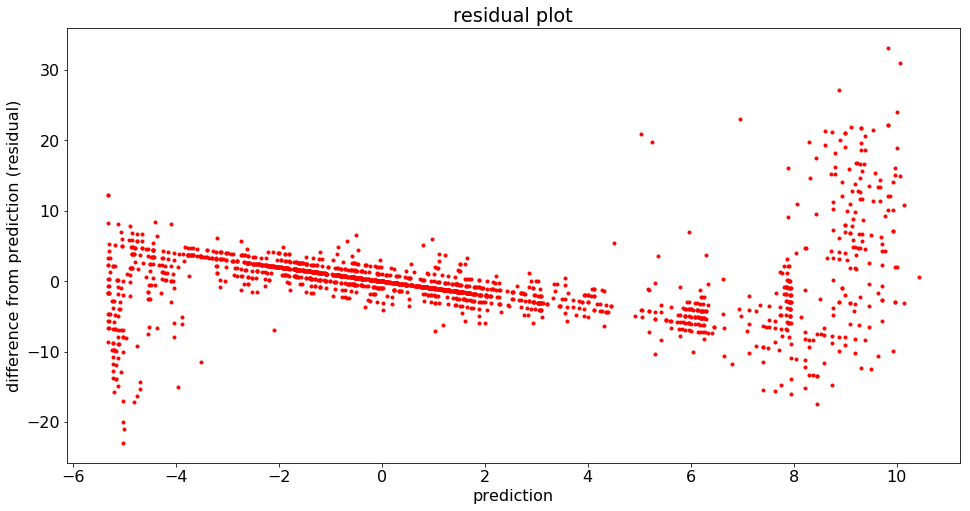

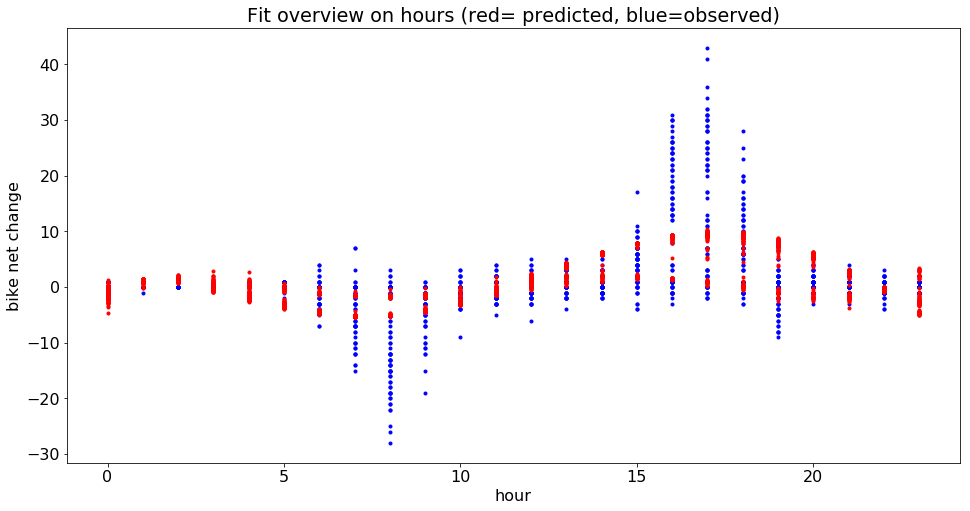

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.89422439446207, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.68773555898224, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.0604658034281, tolerance: 24.314047449161606
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

Degree 6 regression
RMSE: 4.995187384008639
Test score (R²): 0.45444440525225305


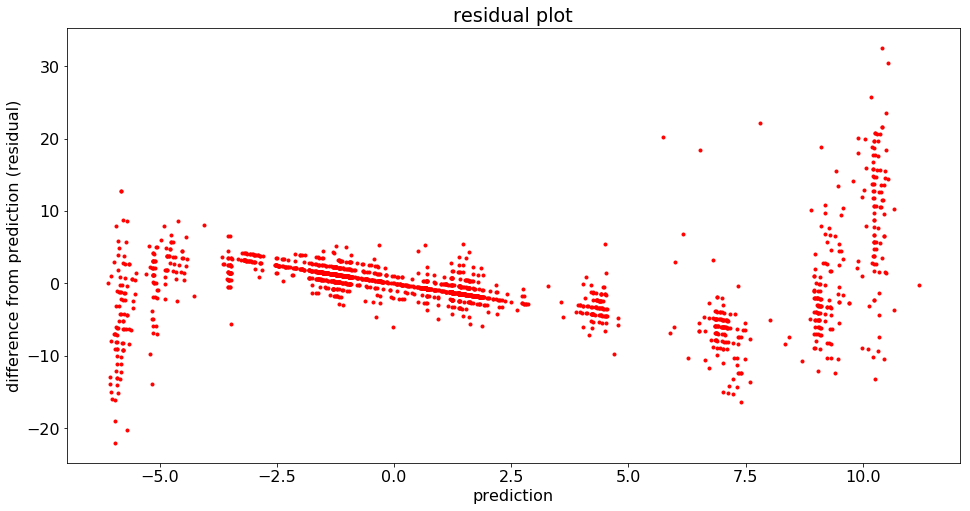

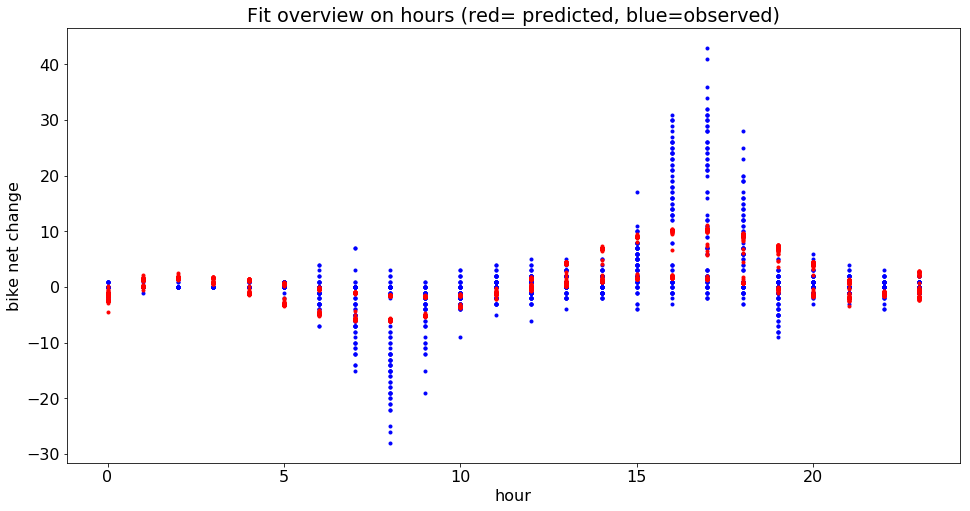

In [126]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# LASSO regression parameters
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=500000
# Min and max degree of polynomials features to consider
degree_min = 1
degree_max = 6
# Test/train split
ML_dataset_prep=dataset_s70.loc[:,["hour","weekday","PrecipitationIn","Mean TemperatureF", "net change"]] # To change to explore other stations
ML_dataset_prep.dropna(inplace=True)
ML_dataset_ready=ML_dataset_prep.loc[:,"hour":"Mean TemperatureF"]

X_train, X_test, y_train, y_test = train_test_split(ML_dataset_ready, ML_dataset_prep.loc[:,"net change"],test_size=0.2)
# Pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    print("Degree " + str(degree) + " regression")
    RMSE=np.sqrt(np.mean(np.square(test_pred-y_test)))
    print("RMSE: " + str(RMSE))
    test_score = model.score(X_test,y_test)
    print("Test score (R²): " + str(test_score))
    plot=plt.plot(test_pred,y_test-test_pred, 'r.')
    plt.title("residual plot")
    plt.xlabel("prediction")
    plt.ylabel("difference from prediction (residual)")
    plt.show()
    plot=plt.plot(X_test.loc[:,"hour"],y_test, 'b.')
    plot=plt.plot(X_test.loc[:,"hour"],test_pred, 'r.')
    plt.title("Fit overview on hours (red= predicted, blue=observed)")
    plt.xlabel("hour")
    plt.ylabel("bike net change")
    plt.show()

In [127]:
features=np.asarray(model['polynomialfeatures'].get_feature_names())
coefs=model['lassocv'].coef_
features=features[coefs!=0.0]
features=[s.replace('x0','hour') for s in features]
features=[s.replace('x1','weekday') for s in features]
features=[s.replace('x2','precipitation') for s in features]
features=[s.replace('x3','temperature') for s in features]
print(features)

['hour', 'precipitation', 'temperature', 'hour^2', 'hour weekday', 'hour temperature', 'precipitation^2', 'hour^3', 'hour^2 weekday', 'hour^2 temperature', 'hour precipitation^2', 'weekday temperature^2', 'precipitation^3', 'hour^4', 'hour^3 weekday', 'hour^3 precipitation', 'hour^3 temperature', 'hour^2 weekday^2', 'hour^2 precipitation temperature', 'hour weekday^3', 'hour weekday^2 precipitation', 'hour weekday^2 temperature', 'hour weekday precipitation^2', 'hour temperature^3', 'weekday^4', 'precipitation temperature^3', 'hour^5', 'hour^4 temperature', 'hour^3 weekday^2', 'hour^3 weekday temperature', 'hour^3 temperature^2', 'hour^2 weekday^3', 'hour^2 weekday precipitation temperature', 'hour weekday^3 temperature', 'weekday^3 temperature^2', 'weekday^2 precipitation temperature^2', 'temperature^5', 'hour^6', 'hour^5 weekday', 'hour^5 temperature', 'hour^4 weekday^2', 'hour^4 weekday precipitation', 'hour^4 weekday temperature', 'hour^4 precipitation^2', 'hour^4 precipitation tem

### Model conclusions
#### station 70 best model

Degree 6 polynomial

RMSE: 4.995

Test score (R²): 0.454

#### Station 88 best model

Degree 6 polynomial

RMSE: 4.642

Test score (R²): 0.287

#### Station 50 best model

Degree 6 polynomial

RMSE: 2.894

Test score (R²): 0.343

#### Station 61 best model

Degree 6 polynomial

RMSE: 2.278

Test score (R²): 0.133

#### Station 65 best model

Degree 6 polynomial

RMSE: 2.404

Test score (R²): 0.359

Several problems arise here. First of all, it seems that our model only predicts very low absolute values in their respective ranges. Considering that the whole point of these predictions is to predict when very high (or very low) values may happen to plan accordingly, this makes the model useless for our purpose as it is.

Second, RMSEs seem a bit high compared to their respective ranges. R-squared values are also pretty low for prediction.

Finally, residual plots constantly show heteroscedasticity and a pattern similar to the net change vs. hour plots. This can be interpreted as the sign of two (not mutually exclusive) things: we lack some important variable in the model, and there is autocorrelation.

Adding new informative variables could potentially account for more variance, explain the extreme values and mitigate even more the possible autocorrelation. A traffic variable, for instance, could maybe help the model understand why some sudden peaks happen. Manifestation days, public transportation strikes, road closures and other similar factors could also be very useful to include.

As such, it is not recommended to discard this model all together as it could potentially be improved to reach an interesting predicting accuracy in the future. Nevertheless, in order to have a usable implementation in reasonable time, it could also be useful to explore other kinds of models.

As was mentionned before, this type of data usually suggests to use time series models. So let's explore one to see if we can do better.

## Time series modeling (Holt-Winters)

Reminder here to make it easy to run the rest of the code on different stations of interest:

The 5 ~most used stations were 70, 88, 50, 61 and 65

The 5 ~least used were 26 , 85, 83, 21 and 24

In [0]:
dataset_station=ML_dataset.loc[ML_dataset.loc[:,"station"]==70,:] # Change this to explore other stations

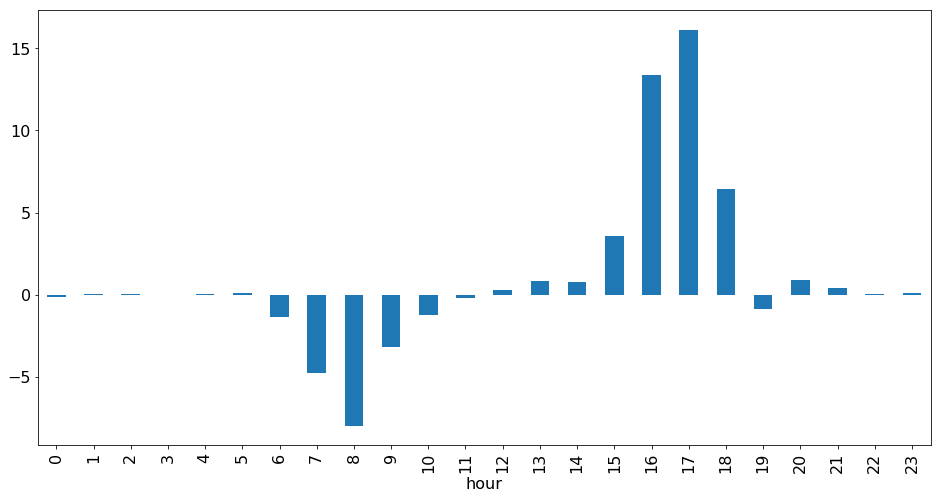

In [206]:
dataset_station.groupby('hour')['net change'].mean().plot.bar()

In [0]:
hourly = dataset_station.resample('H').mean()                            #I'm not exactly sure why, but the dataset gets a bit buggy if I don't resample it before
# Converting to daily mean
daily = np.abs(dataset_station.loc[:,"net change"]).resample('D').mean() #Taking the absolute value to study daily movements
                                                                         #otherwise we very well might end up having a 0 net change because we had as many used in one side or the other, while having a lot of movement

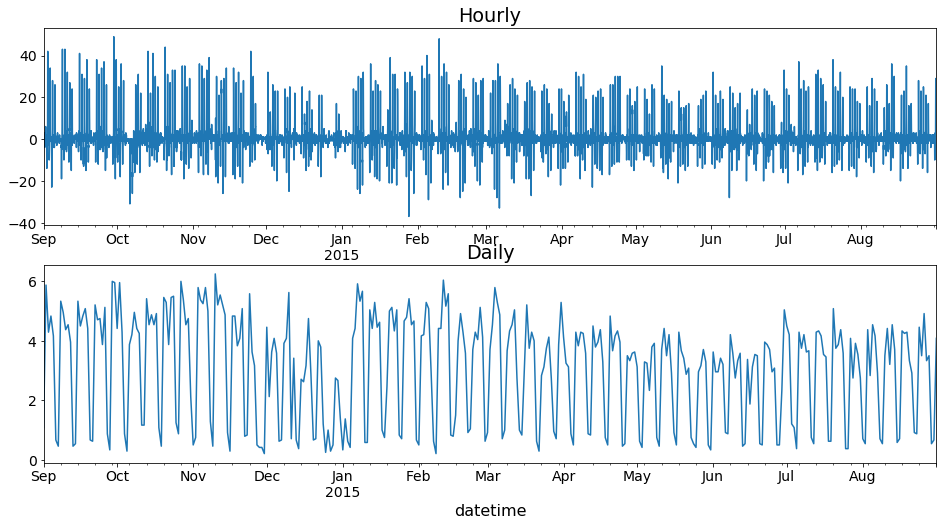

In [208]:
fig, axs = plt.subplots(2,1) 
hourly.loc[:,"net change"].plot(figsize=(16,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.plot(figsize=(16,8), title= 'Daily', fontsize=14, ax=axs[1])

In [0]:
train=hourly.loc['2014-09-17':'2015-05-31 23:00:00']
valid=hourly.loc['2015-06-01':'2015-08-29 23:00:00',:]

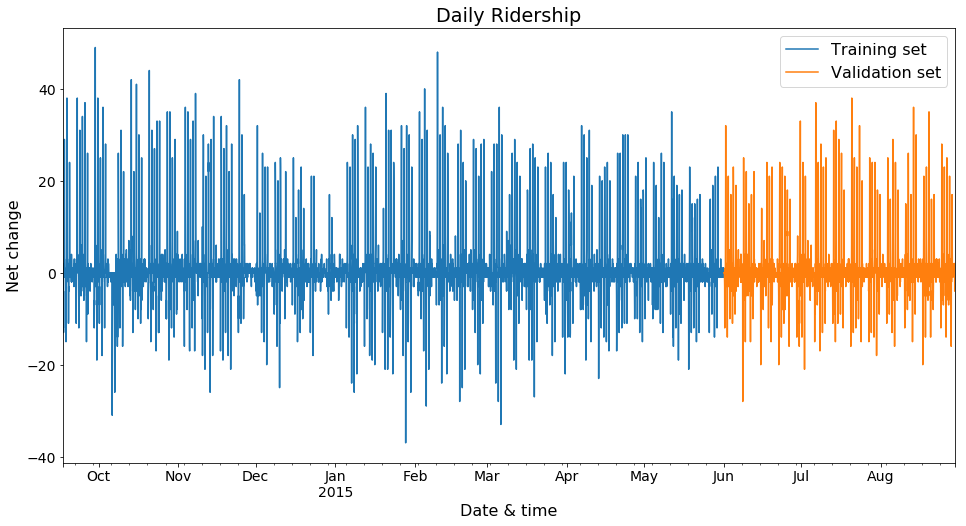

In [210]:
train.loc[:,"net change"].plot(figsize=(16,8), title= 'Daily Ridership', fontsize=14, label='Training set')
valid.loc[:,"net change"].plot(figsize=(16,8), title= 'Daily Ridership', fontsize=14, label='Validation set')
plt.xlabel("Date & time")
plt.ylabel("Net change")
plt.legend(loc='best')
plt.show()

### Seasonality and trend

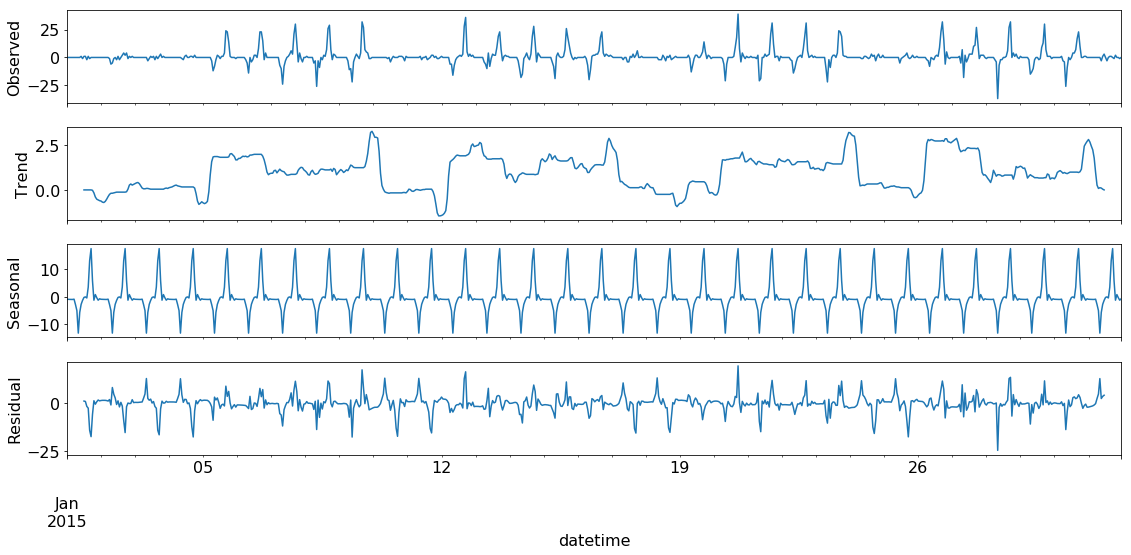

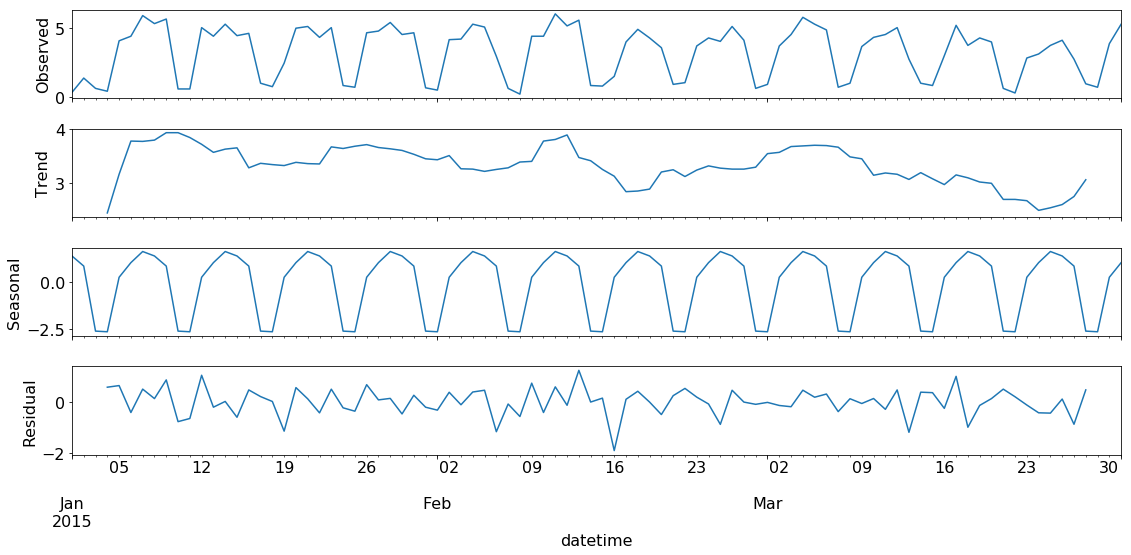

In [211]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(hourly.loc['2015-01-01':'2015-01-31',"net change"]).plot()
plt.show()
sm.tsa.seasonal_decompose(daily.loc['2015-01-01':'2015-03-31']).plot()
plt.show()

There clearly are seasonalities every day on the hourly level and every week on the daily level. This should be reflected in our model.

Since we want an hour-level precision, we can consider seasonality to be of 168H (24H\*7). This way, we no longer need an extra variable to differentiate weekends from weekdays.

Trends seem approximatly stable over time.

# Holt-Winters' general model

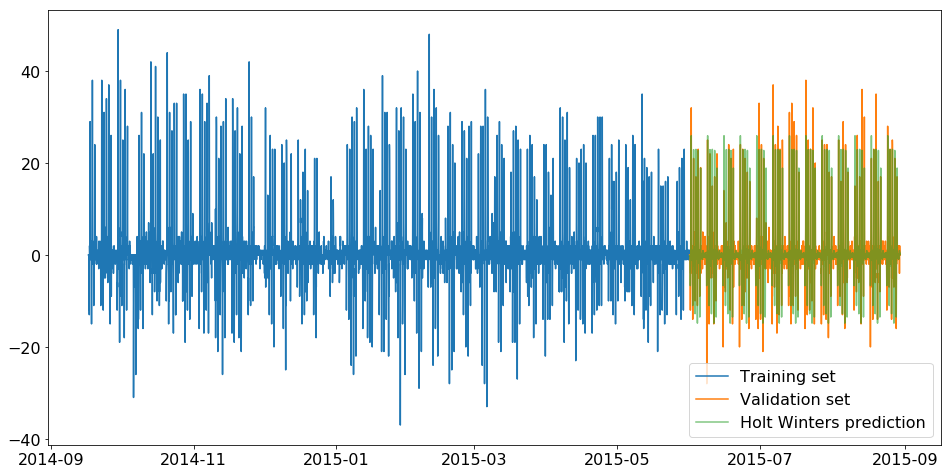

RMSE: 3.0271286524293517


In [212]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat = valid.copy()
fit = ExponentialSmoothing(train.loc[:,"net change"], seasonal_periods=168, seasonal='add').fit()
y_hat.loc[:,"Holt_Winters"] = fit.predict('2015-06-01 00:00:00', '2015-08-29 23:00:00')
plt.plot(train.loc[:,"net change"], label='Training set')
plt.plot(valid.loc[:,"net change"], label='Validation set')
plt.plot(y_hat.loc[:,"Holt_Winters"], label='Holt Winters prediction', alpha=0.6)
plt.legend(loc='best')
plt.show()
rmse = np.sqrt(metrics.mean_squared_error(valid.loc[:,"net change"], y_hat.loc[:,"Holt_Winters"]))
print("RMSE: " + str(rmse))

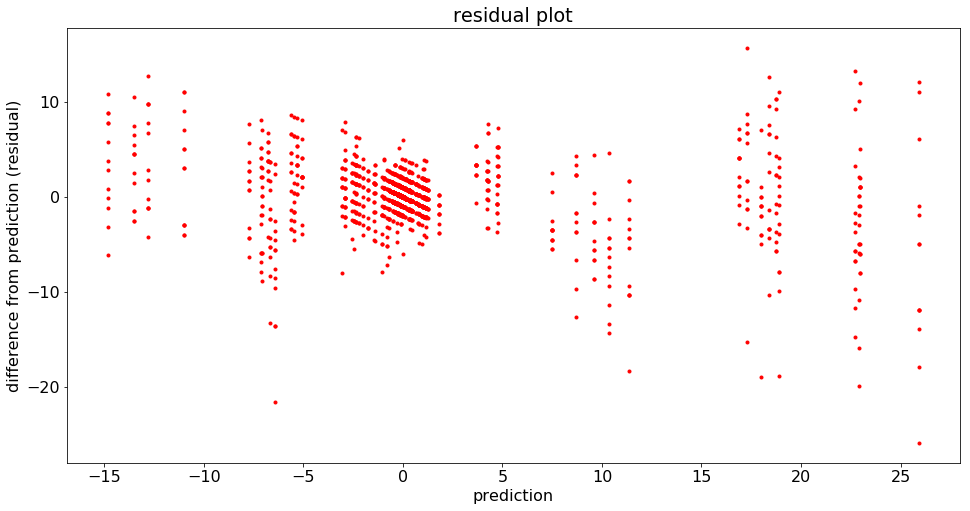

In [213]:
plt.plot(y_hat.loc[:,"Holt_Winters"], valid.loc[:,"net change"]-y_hat.loc[:,"Holt_Winters"], 'r.')
plt.title("residual plot")
plt.xlabel("prediction")
plt.ylabel("difference from prediction (residual)")
plt.show()

## Holt-Winters' model week-by-week without retrain

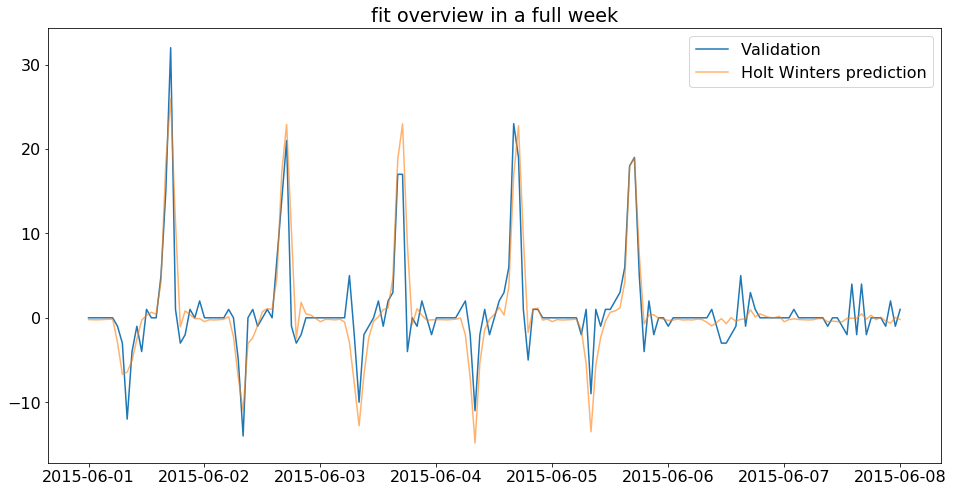

RMSE for this week: 2.745268138169119


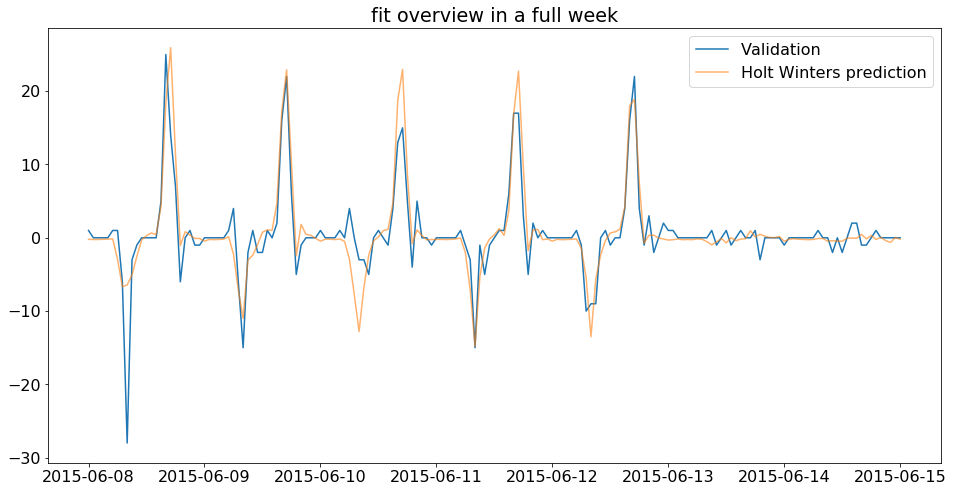

RMSE for this week: 3.0032969677501304


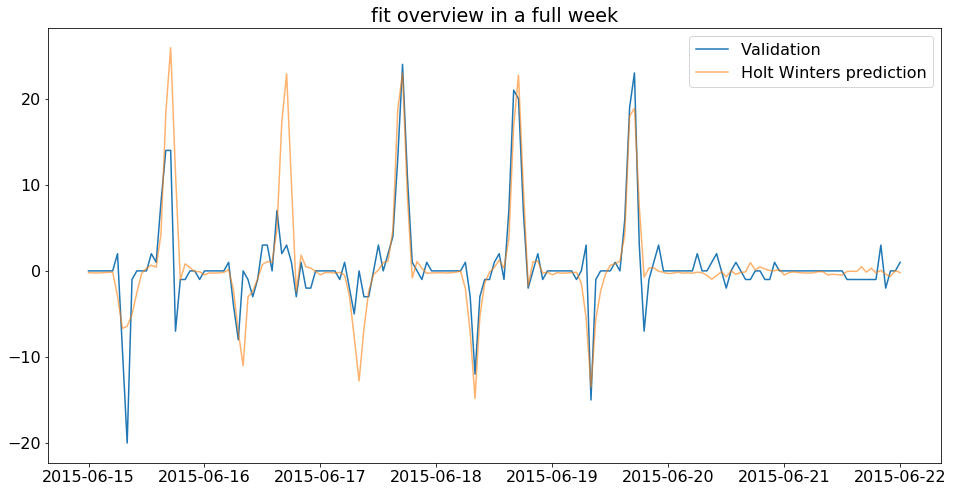

RMSE for this week: 3.6195776322905733


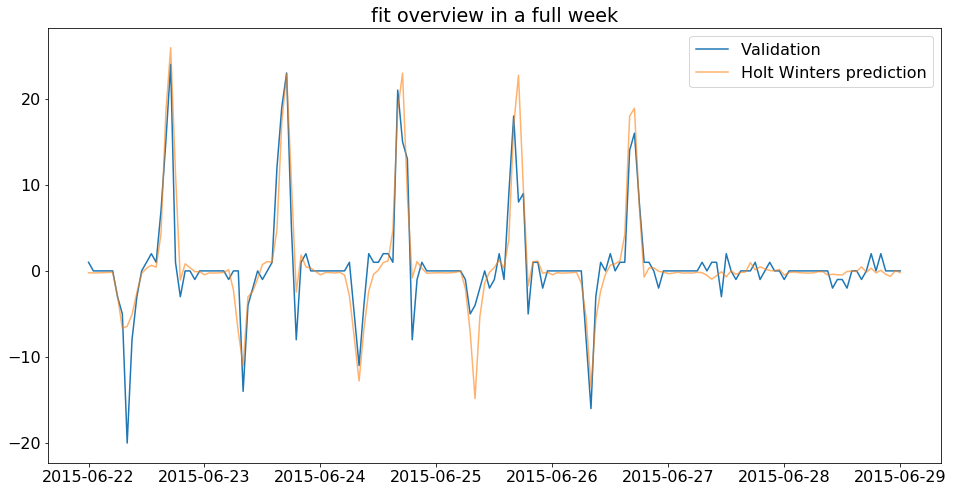

RMSE for this week: 2.7404492917564993


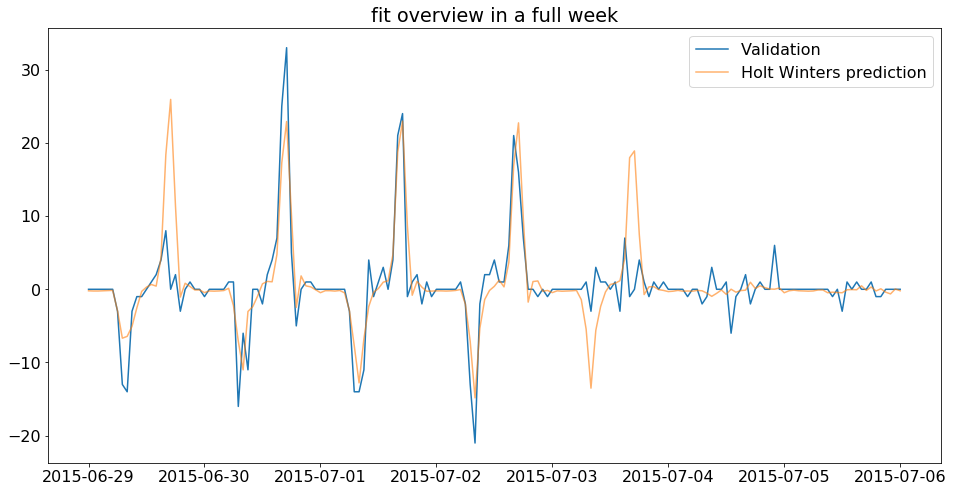

RMSE for this week: 4.16510100913201


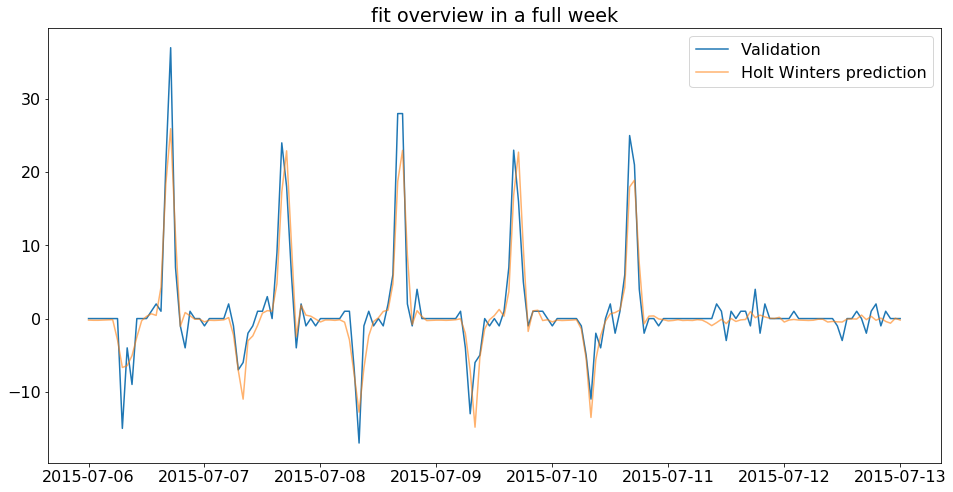

RMSE for this week: 2.5680129941062937


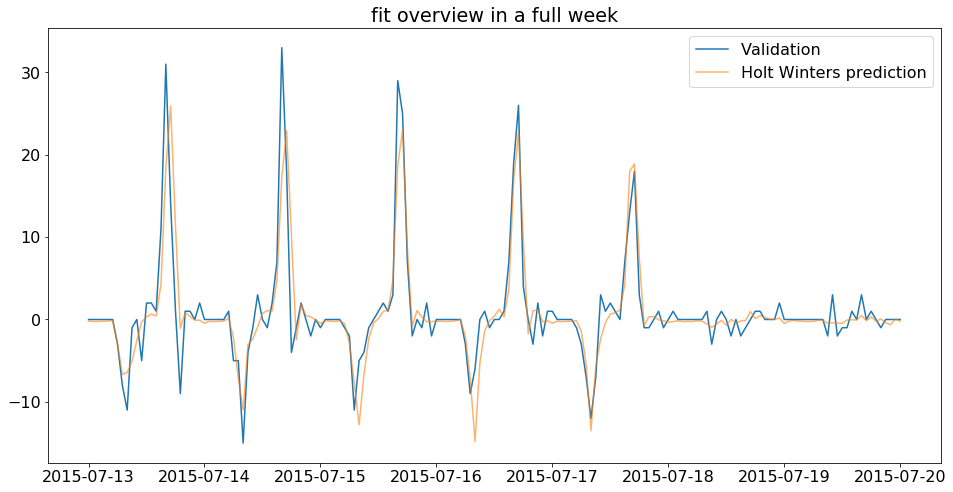

RMSE for this week: 3.1785998701007547


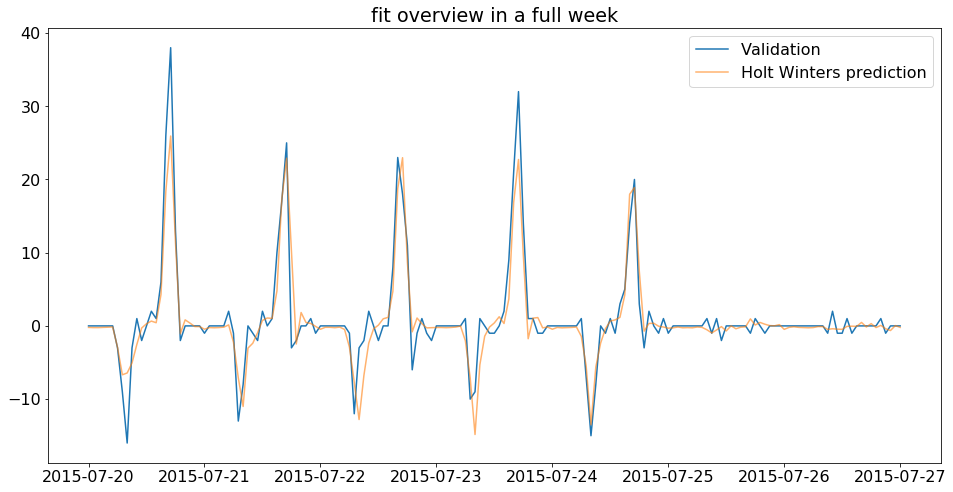

RMSE for this week: 2.709231690957023


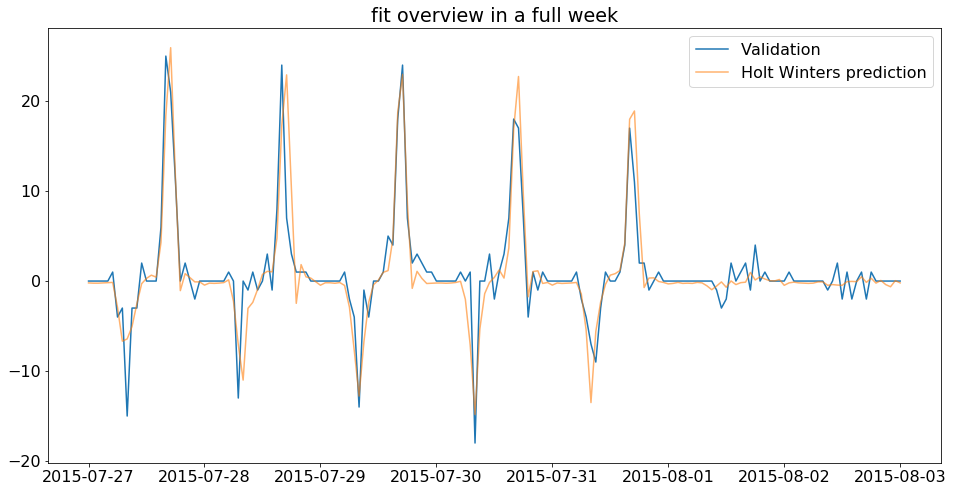

RMSE for this week: 2.7271891383389093


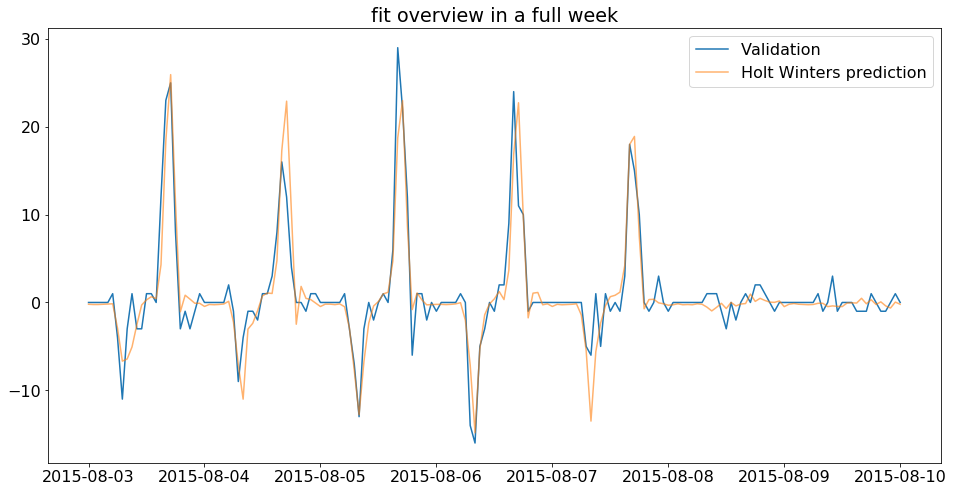

RMSE for this week: 2.561913722829232


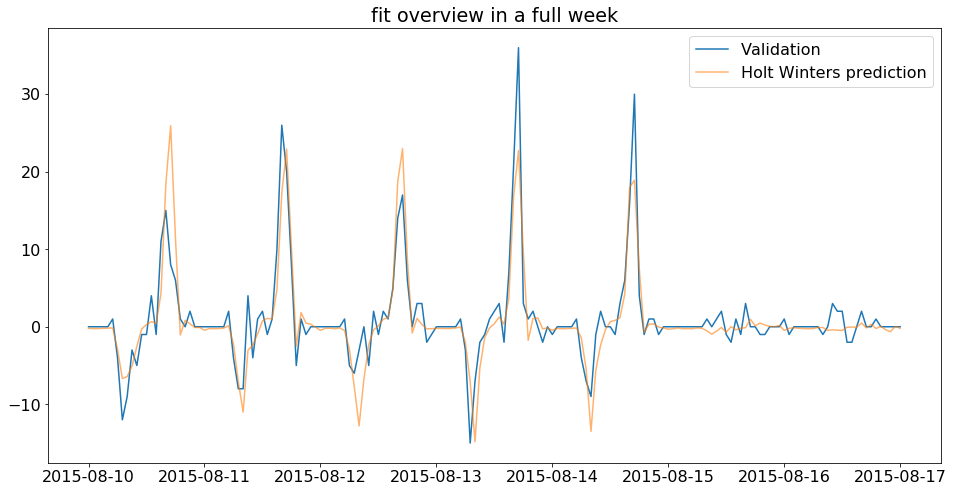

RMSE for this week: 3.109895242885319


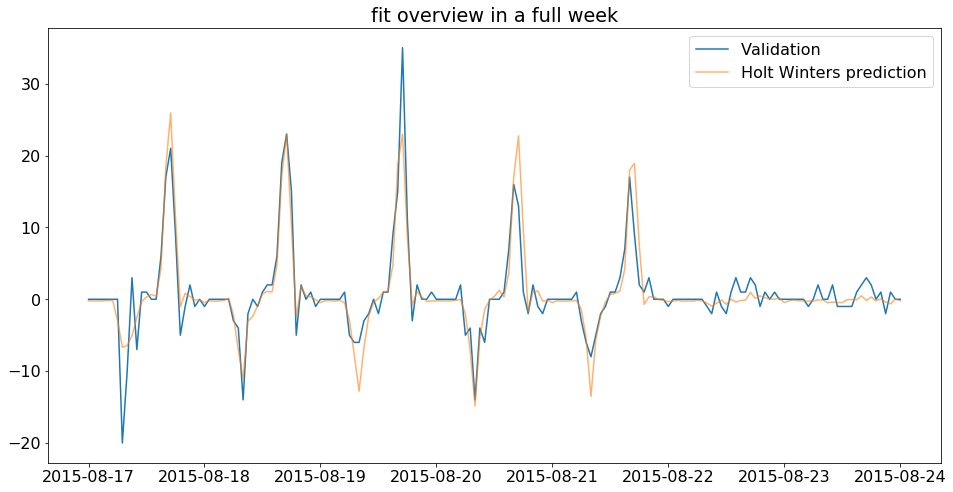

RMSE for this week: 2.6244723241300663


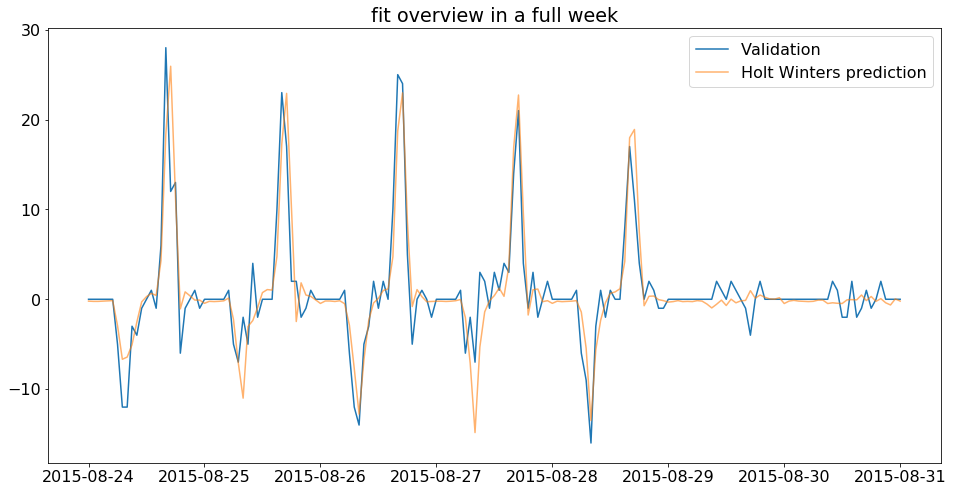

RMSE for this week: 2.8661867645531753
Average RMSE: 2.9707072913076233


In [214]:
valid_start_date=dt.datetime.strptime('2015-06-01', '%Y-%m-%d')
time_diff=dt.timedelta(days=7)
valid_end_date=valid_start_date + time_diff
valid_start_date_index=str(valid_start_date)
valid_end_date_index=str(valid_end_date)
valid=hourly.loc[valid_start_date_index:valid_end_date_index,:]
weekly_rmse=[]
while(valid.shape[0]>=168):
  y_hat = valid.copy()
  y_hat.loc[:,"Holt_Winters"] = fit.predict(valid_start_date_index, valid_end_date_index)
  plt.plot(valid.loc[:,"net change"], label='Validation')
  plt.plot(y_hat.loc[:,"Holt_Winters"], label='Holt Winters prediction', alpha=0.6)
  plt.legend(loc='best')
  plt.title("fit overview in a full week")
  plt.show()
  weekly_rmse.append(np.sqrt(metrics.mean_squared_error(valid.loc[:,"net change"], y_hat.loc[:,"Holt_Winters"])))
  print("RMSE for this week: " + str(weekly_rmse[-1]))
  valid_start_date += time_diff
  valid_end_date += time_diff
  valid_start_date_index=str(valid_start_date)
  valid_end_date_index=str(valid_end_date)
  valid=hourly.loc[valid_start_date_index:valid_end_date_index,:]
print("Average RMSE: " + str(np.mean(weekly_rmse)))

## Holt-Winters' model week-by-week with weekly retrain

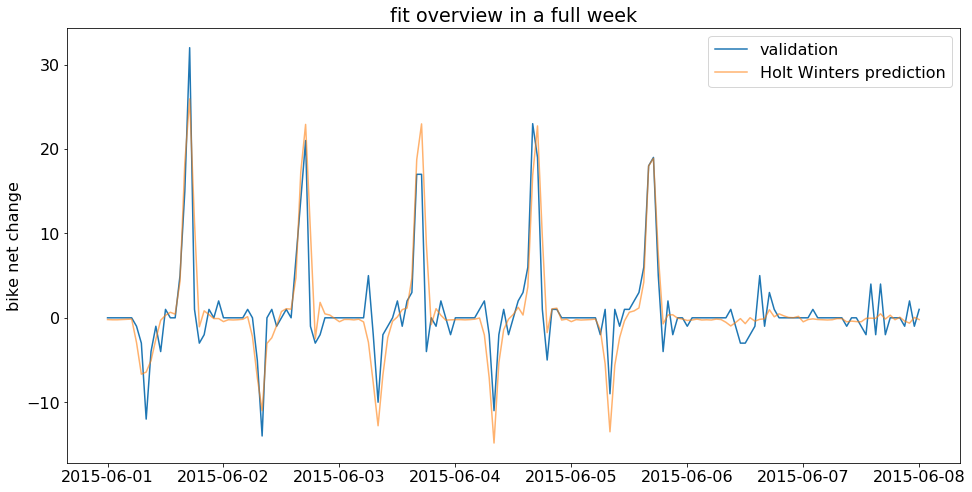

RMSE for this week: 2.745268138169119


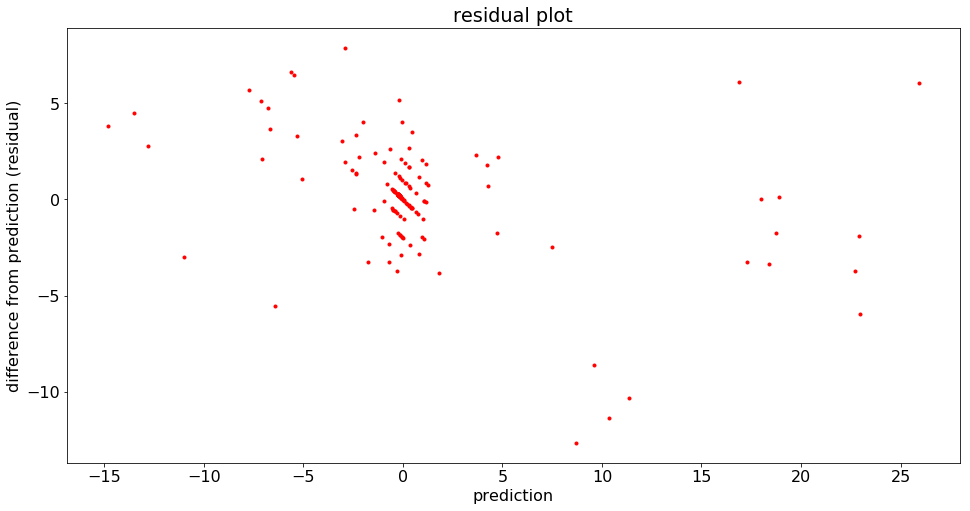

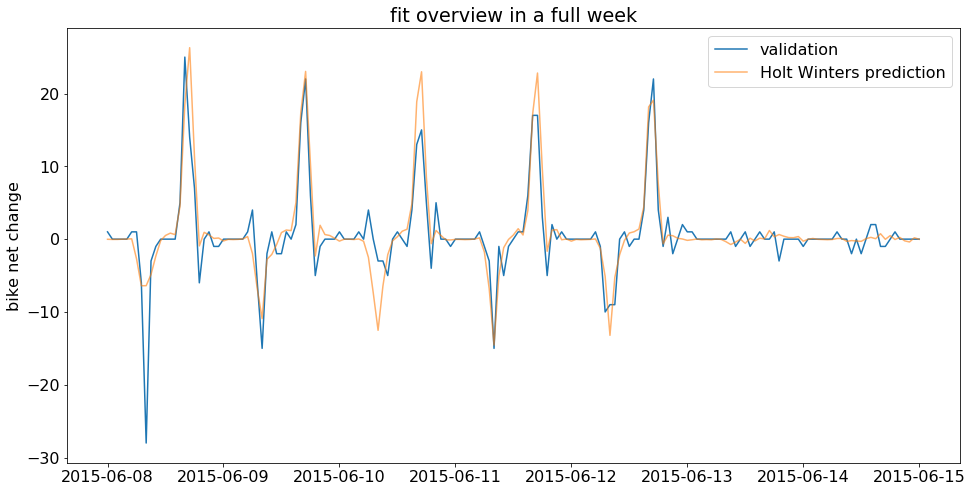

RMSE for this week: 2.9885496807835534


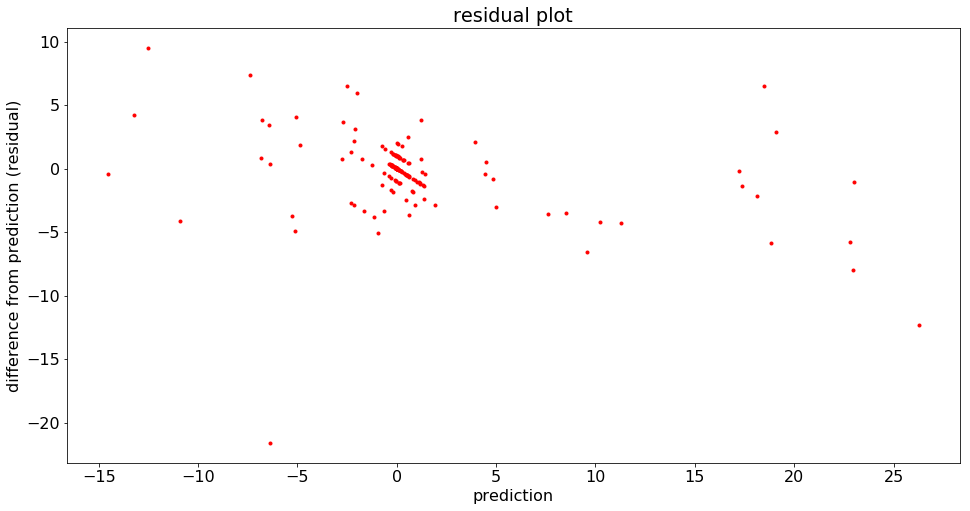

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


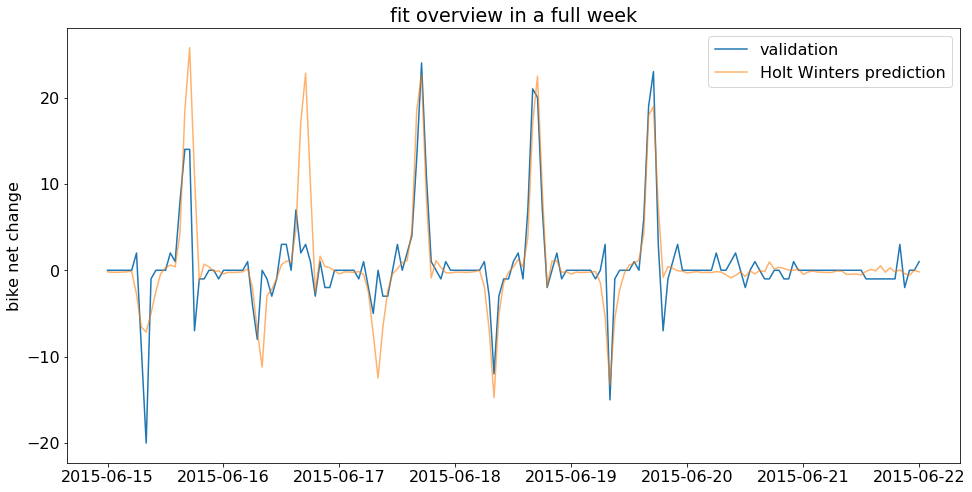

RMSE for this week: 3.5595053312586815


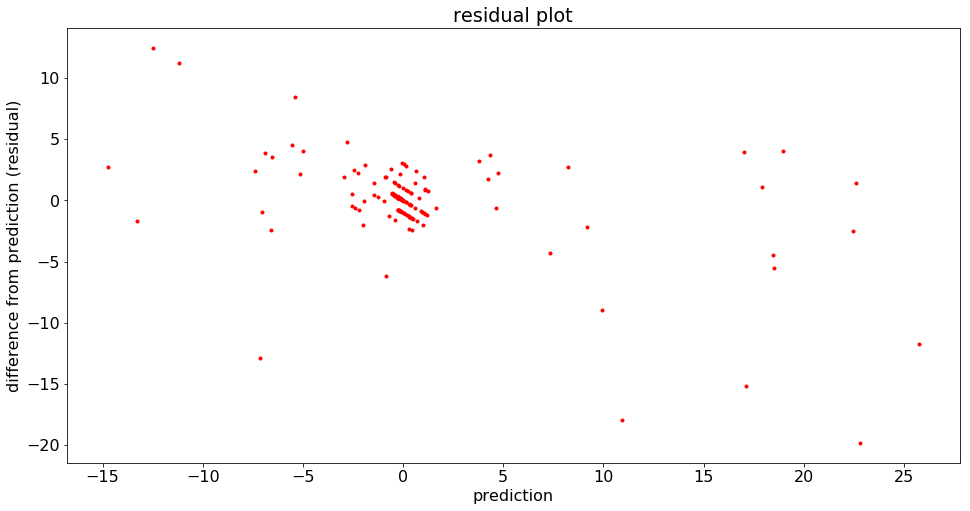

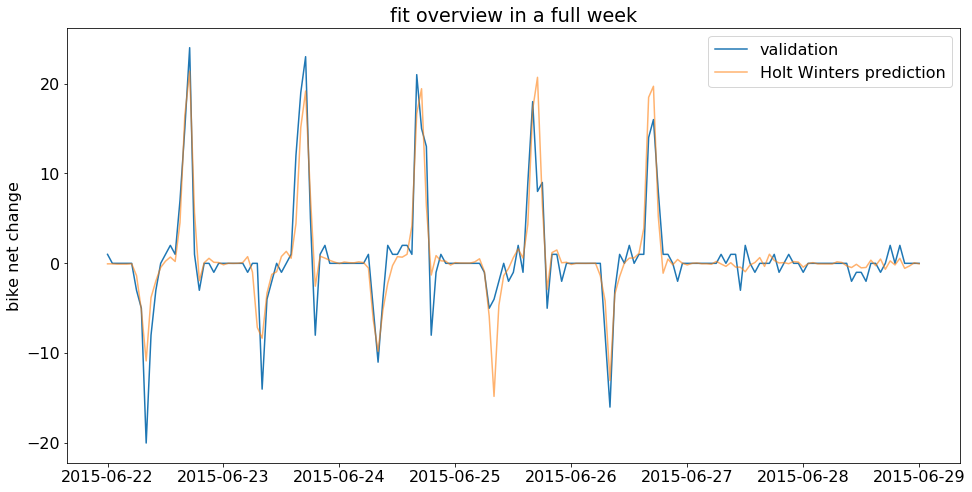

RMSE for this week: 2.4386883287210264


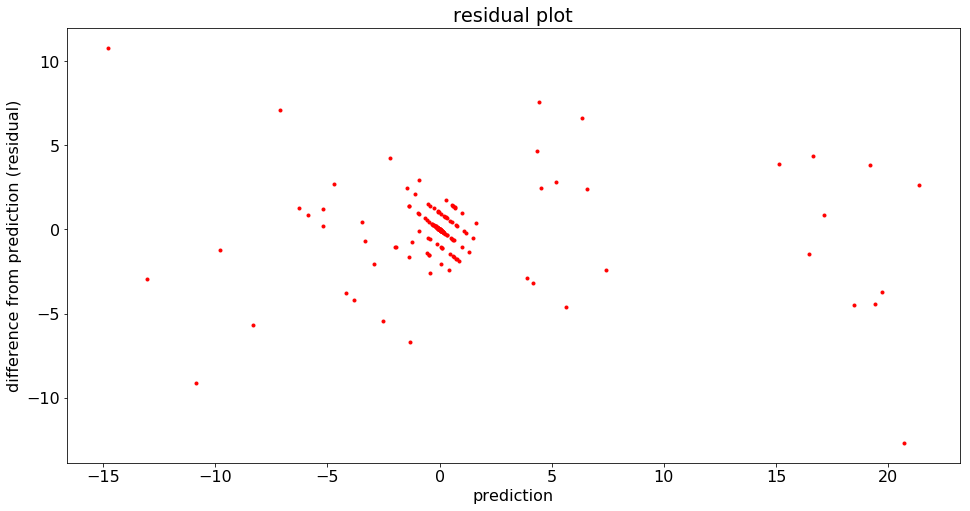

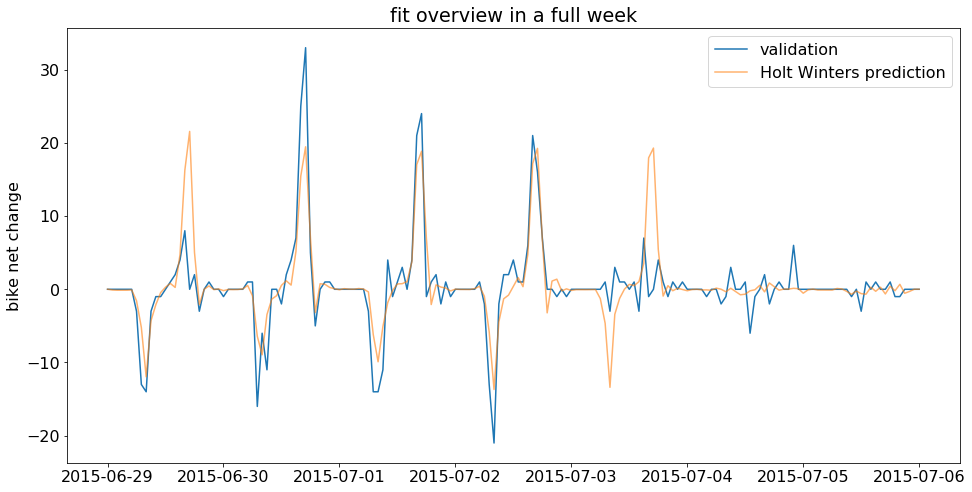

RMSE for this week: 3.9510771148102433


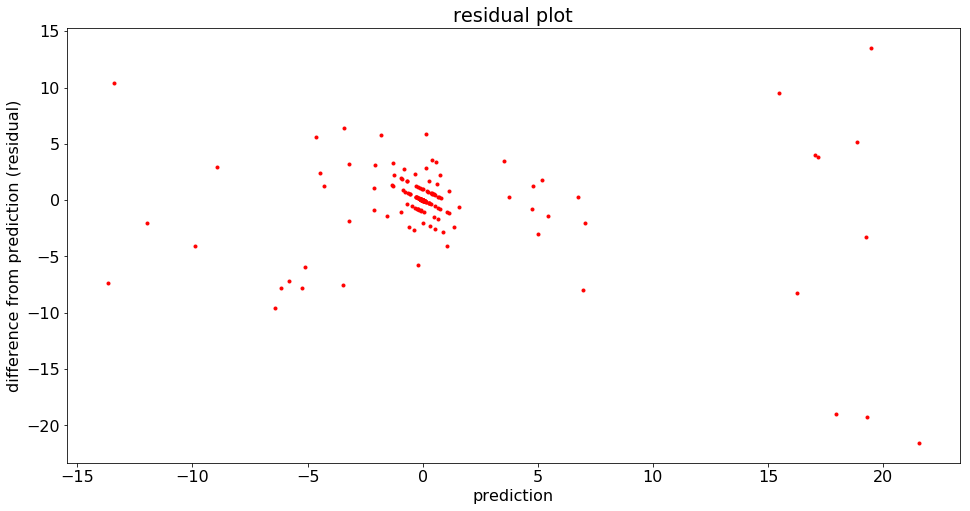

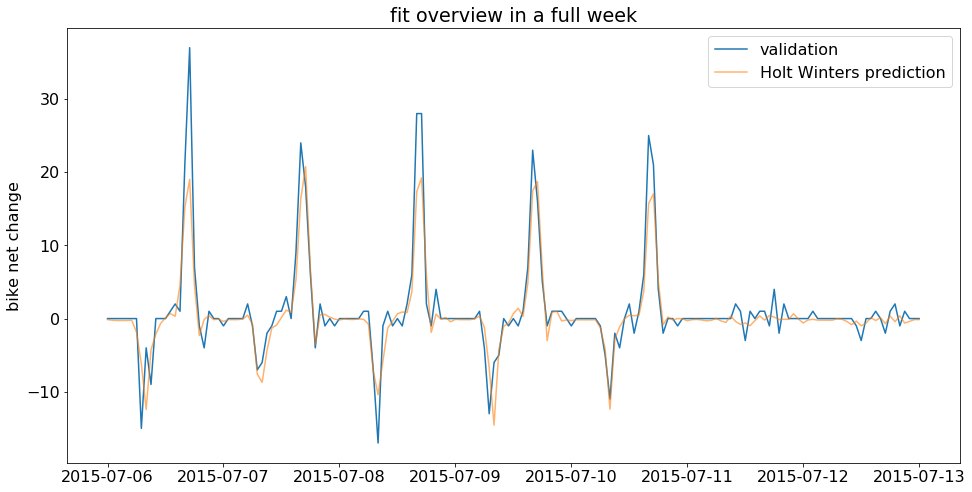

RMSE for this week: 2.8503649418993695


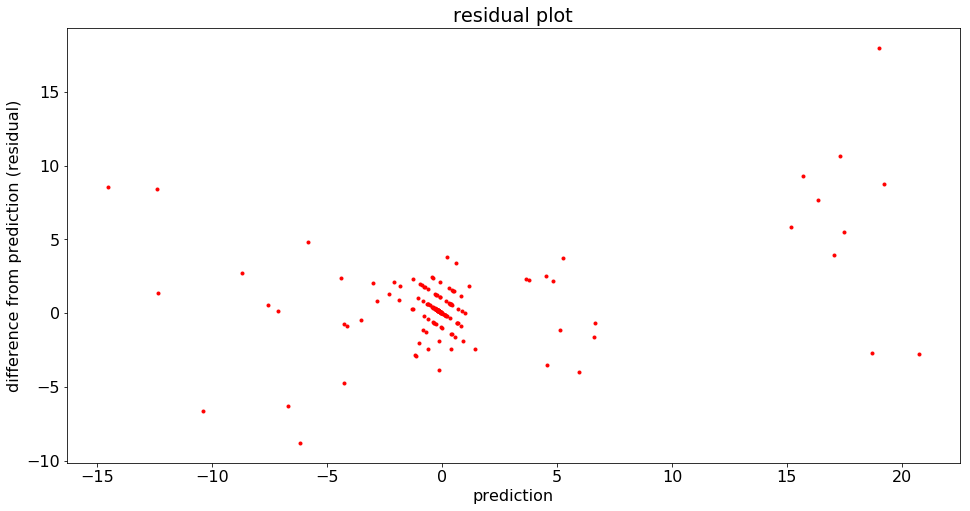

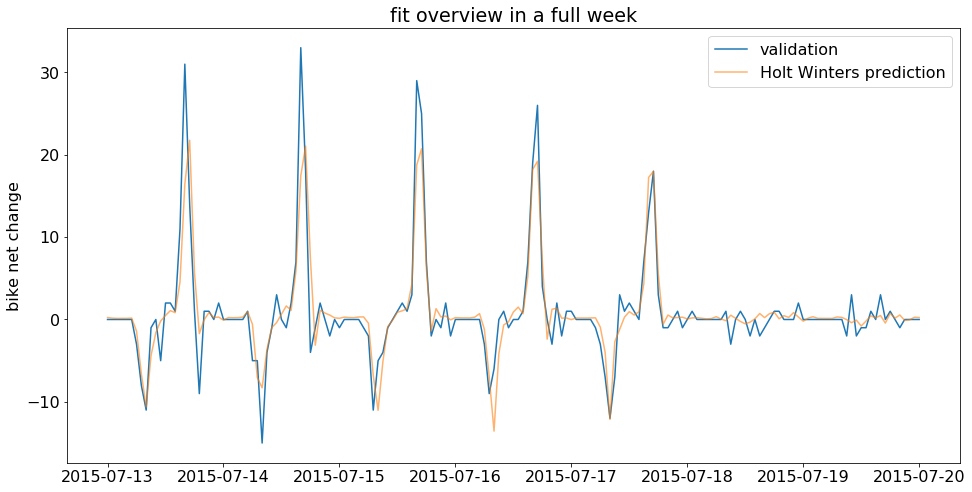

RMSE for this week: 2.929229787654098


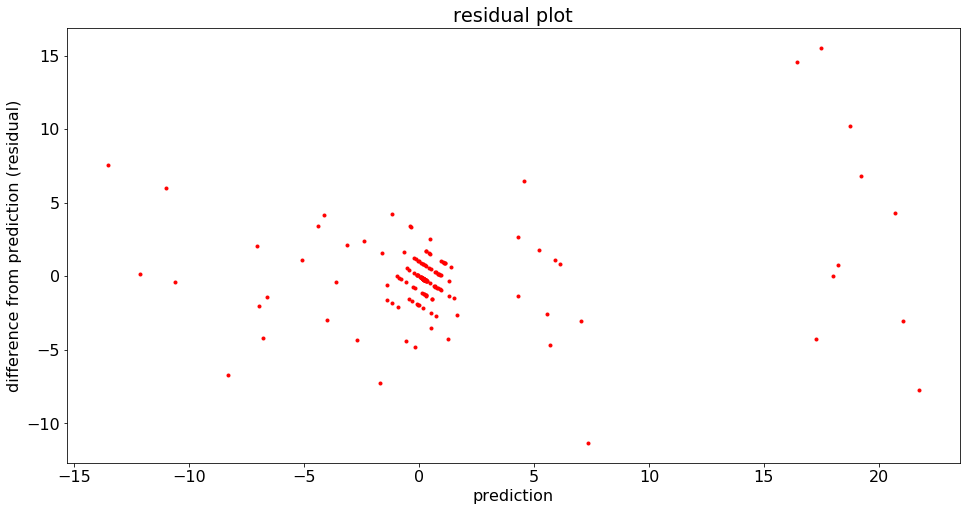

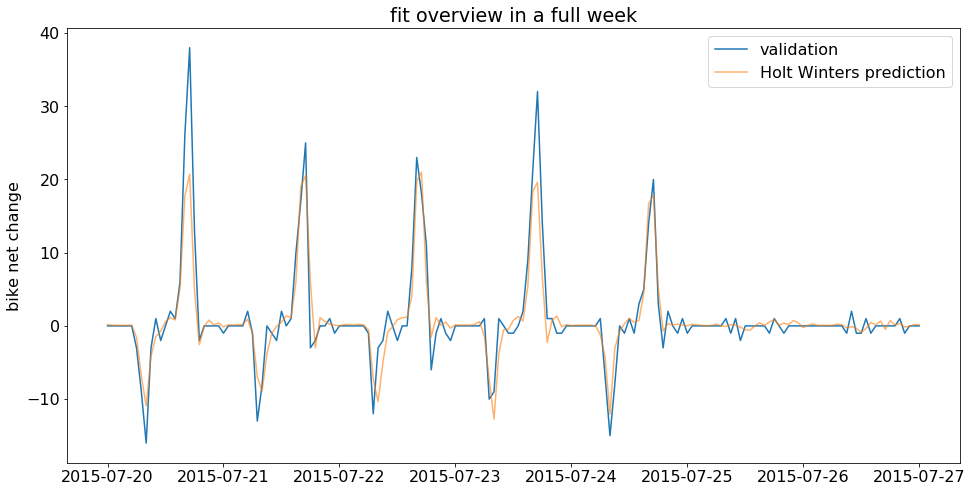

RMSE for this week: 2.7390897646567787


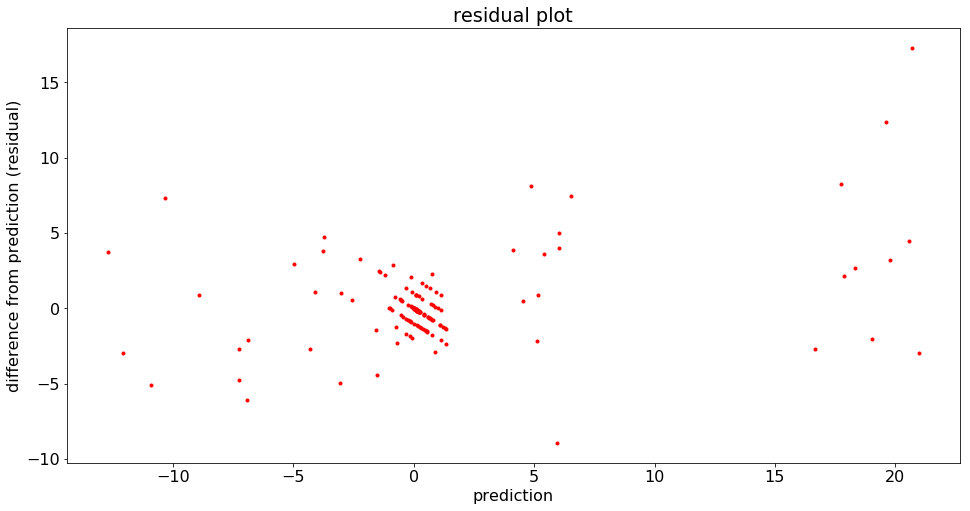

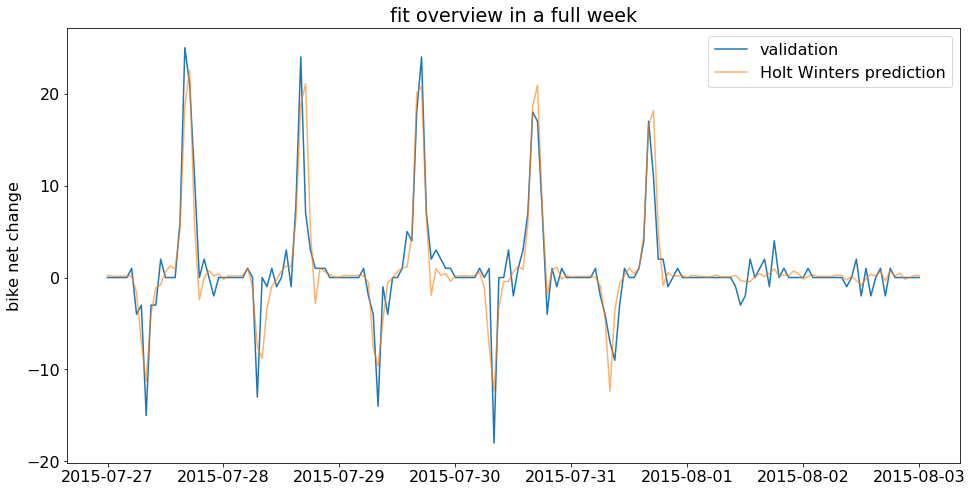

RMSE for this week: 2.417615222266901


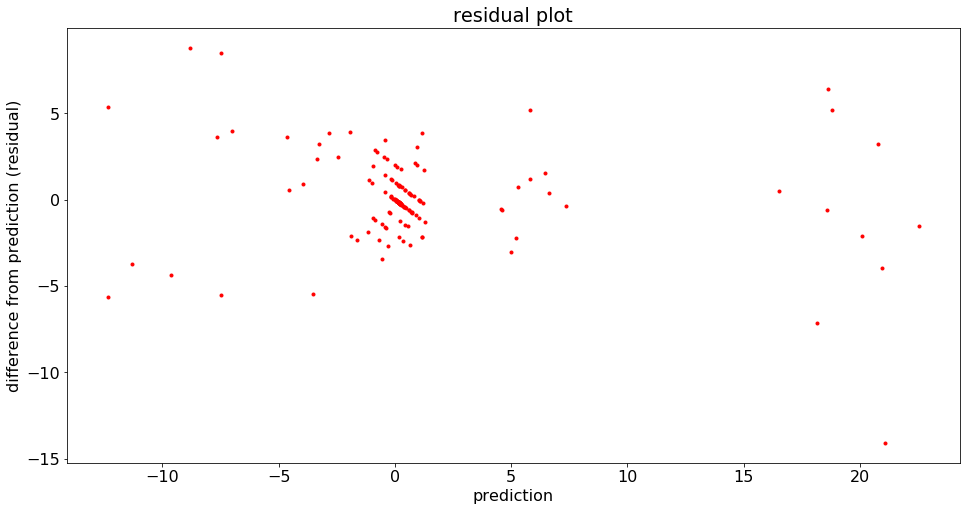

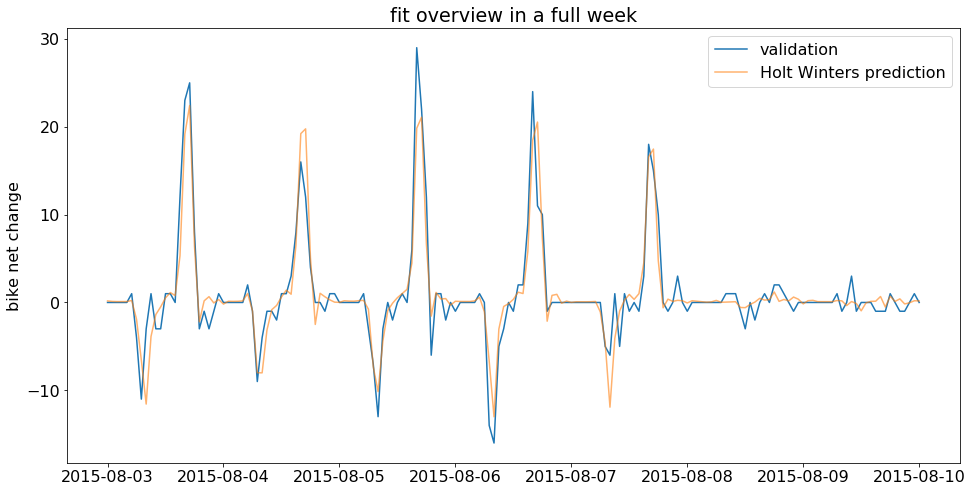

RMSE for this week: 2.3020582238179608


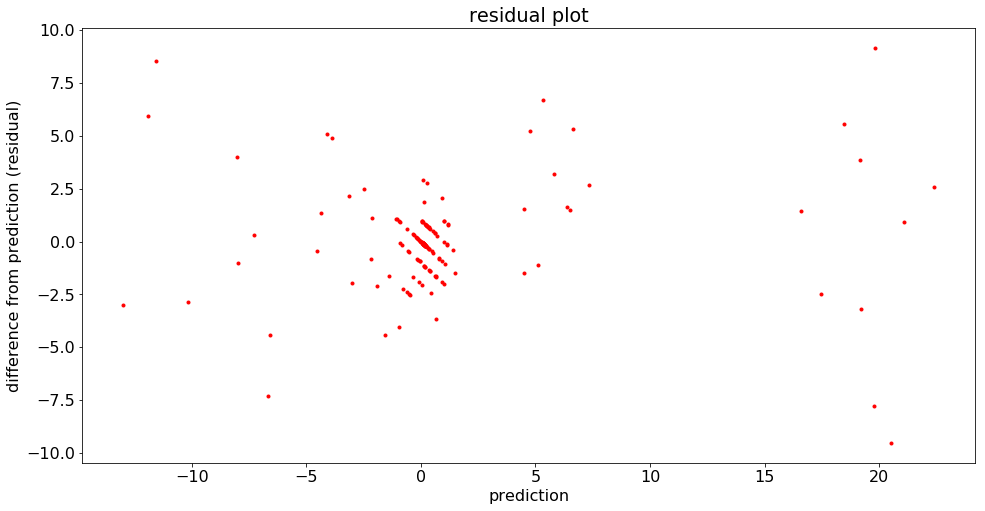

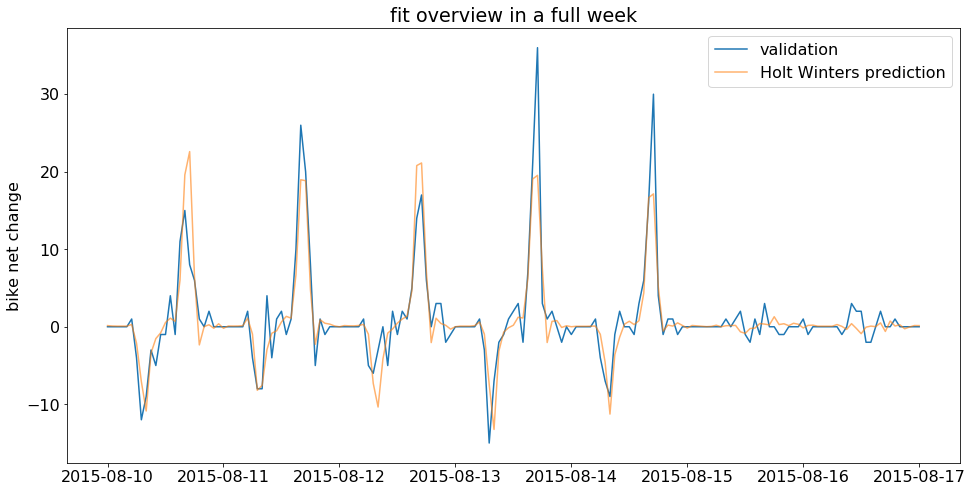

RMSE for this week: 2.8872913853915523


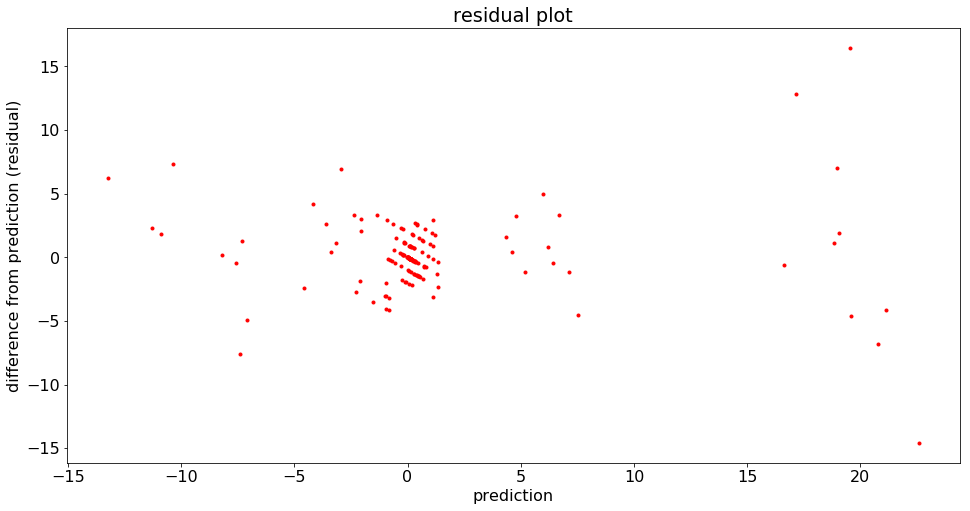

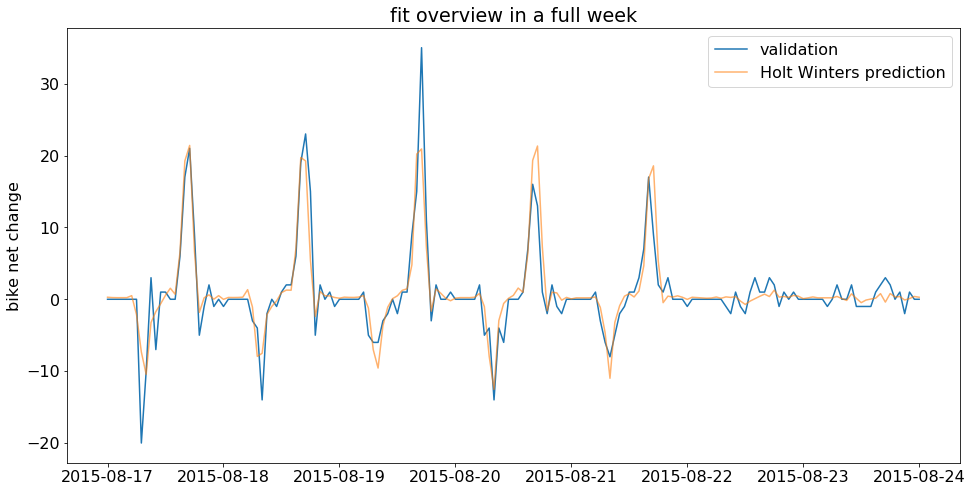

RMSE for this week: 2.6050261022138237


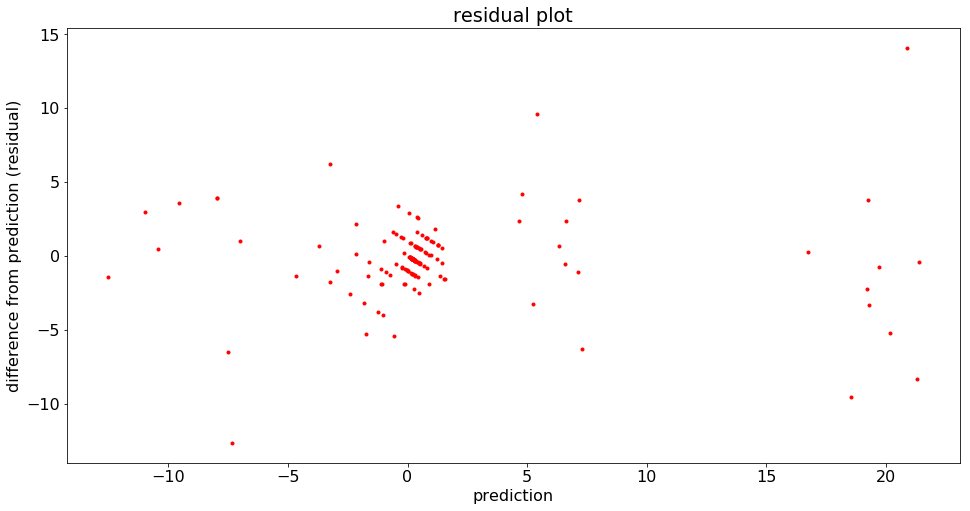

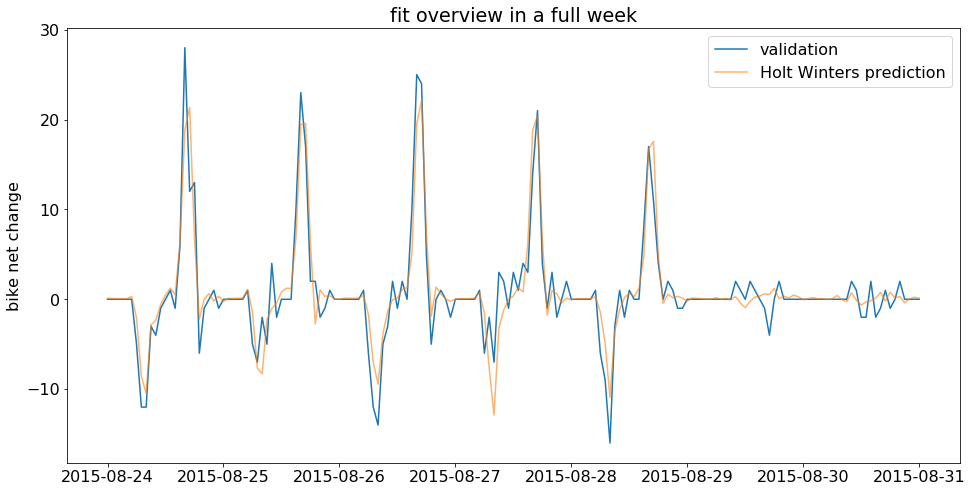

RMSE for this week: 2.432625101965182


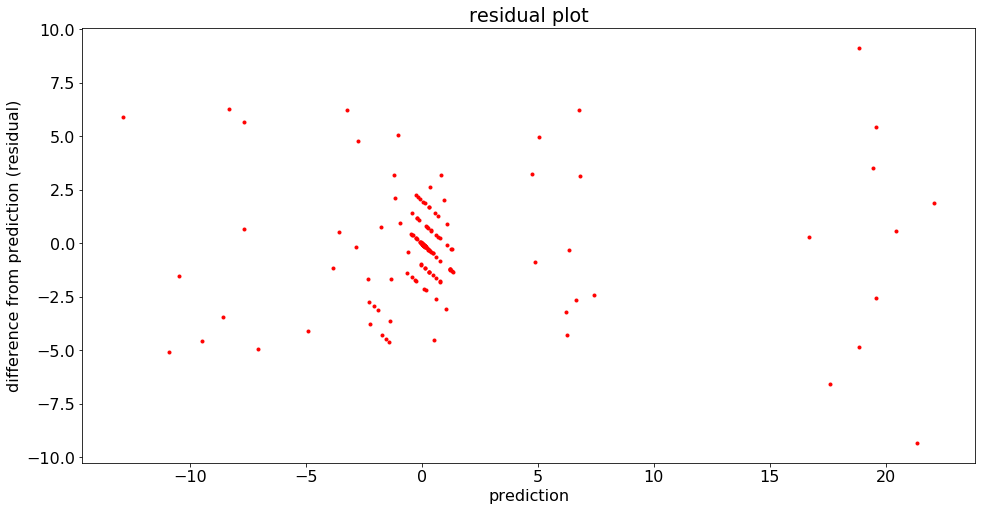

Average RMSE: 2.8343376248929455


In [215]:
train_end_date=dt.datetime.strptime('2015-05-31 23:00:00', '%Y-%m-%d %H:%M:%S')
valid_start_date=train_end_date + dt.timedelta(hours=1)
time_diff=dt.timedelta(days=7)
valid_end_date=valid_start_date + time_diff
train_end_date_index=str(train_end_date)
valid_start_date_index=str(valid_start_date)
valid_end_date_index=str(valid_end_date)
train=hourly.loc['2014-09-17':train_end_date_index]
valid=hourly.loc[valid_start_date_index:valid_end_date_index,:]

weekly_rmse=[]

while(valid.shape[0]>=168):
  y_hat = valid.copy()
  fit = ExponentialSmoothing(train.loc[:,"net change"], seasonal_periods=168, seasonal='add').fit()
  y_hat.loc[:,"Holt_Winters"] = fit.predict(valid_start_date_index, valid_end_date_index)
  plt.plot(valid.loc[:,"net change"], label='validation')
  plt.plot(y_hat.loc[:,"Holt_Winters"], label='Holt Winters prediction', alpha=0.6)
  plt.ylabel("bike net change")
  plt.legend(loc='best')
  plt.title("fit overview in a full week")
  plt.show()
  weekly_rmse.append(np.sqrt(metrics.mean_squared_error(valid.loc[:,"net change"], y_hat.loc[:,"Holt_Winters"])))
  print("RMSE for this week: " + str(weekly_rmse[-1]))
  plt.plot(y_hat.loc[:,"Holt_Winters"], valid.loc[:,"net change"]-y_hat.loc[:,"Holt_Winters"], 'r.')
  plt.title("residual plot")
  plt.xlabel("prediction")
  plt.ylabel("difference from prediction (residual)")
  plt.show()
  train_end_date += time_diff
  valid_start_date += time_diff
  valid_end_date += time_diff
  train_end_date_index=str(train_end_date)
  valid_start_date_index=str(valid_start_date)
  valid_end_date_index=str(valid_end_date)
  train=hourly.loc['2014-09-17':train_end_date_index]
  valid=hourly.loc[valid_start_date_index:valid_end_date_index,:]

print("Average RMSE: " + str(np.mean(weekly_rmse)))

### Model conclusions
#### station 70



RMSE: 2.834



#### Station 88



RMSE: 3.126



#### Station 50



RMSE: 2.173



#### Station 61


RMSE: 2.227


#### Station 65


RMSE: 1.842


The average RMSE is consistently lower than for our first model. This shows a clear superiority of this model compared to the last one, especially since this one does not shy away from predicting extreme values when relevant. A quick look at residual plots also shows a much lower heteroscedasticity.

Retraining the model every week gives better results. It should be possible to automatize a data gathering and model retraining process to ensure getting the best predictions out of the model.


Limitation: This model does _not_ take any other variable than hour (and week day) into account, and is unable to do so.

As it is, it would also be unable to predict the drop in bike usage around Christmas time.

As could be expected, the model struggles with the least used stations. But as they are the least used, their predictions are less important.

Residual plots still show a bit of heteroscedasticity, so there is definitely room for improvement. However, this would require using another model to be able to take variables into account.

A SARIMAX model could be used as a follow-up, but it would probably require variables more closely related to the net change than those we have used here. As was mentionned in the Lasso regression model, traffic data would be an interesting candidate. The amount of bikes currently in use in the whole network could also be interesting to include. In any case, if we do add more variables, the Lasso regression could also be tried again.